In [1]:
import psutil
import os
process = psutil.Process(os.getpid())
print(f'{process.memory_info().rss} bytes')
print(f'{process.memory_info().rss/(1024*1024)} Mbytes')

61767680 bytes
58.90625 Mbytes


In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from net.pfe import *
from train import train_model
import pytorch_metric_learning as pml

In [2]:
batch_size = 32
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 20
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = 512

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

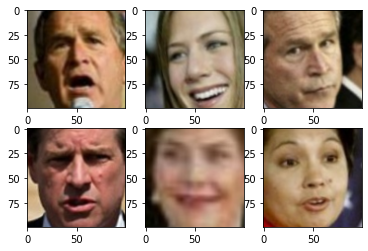

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
# evaluate_accuracy(model, test_loader)

Resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:25<00:00,  1.03it/s]


R@1 : 26.775
R@2 : 39.103
R@4 : 50.560
R@8 : 61.893
R@16 : 72.603
R@32 : 81.943


[0.26774595267745954,
 0.39103362391033625,
 0.5056039850560399,
 0.6189290161892902,
 0.726027397260274,
 0.8194271481942715]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


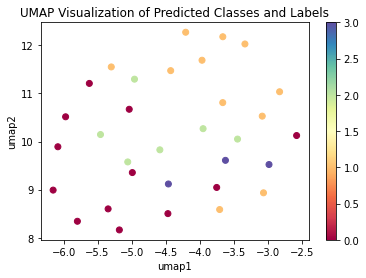

In [8]:
visualize_umap(model, test_loader)

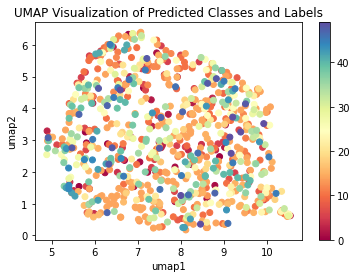

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8587 Time: 9.6001
Step: [20/53] Epoch [1/20] Loss: 3.5775 Time: 19.0545
Step: [30/53] Epoch [1/20] Loss: 5.2745 Time: 28.6021
Step: [40/53] Epoch [1/20] Loss: 6.9446 Time: 38.0056
Step: [50/53] Epoch [1/20] Loss: 8.5126 Time: 47.3856
Step: [53/53] Epoch [1/20] Loss: 8.9551 Time: 49.5711
Epoch [1/20] Loss: 8.9551 Time: 49.5716 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4400 Time: 58.9105
Step: [20/53] Epoch [2/20] Loss: 2.8605 Time: 68.5183
Step: [30/53] Epoch [2/20] Loss: 4.2557 Time: 77.8716
Step: [40/53] Epoch [2/20] Loss: 5.6587 Time: 87.2650
Step: [50/53] Epoch [2/20] Loss: 7.0682 Time: 96.8773
Step: [53/53] Epoch [2/20] Loss: 7.4742 Time: 99.0690
Epoch [2/20] Loss: 7.4742 Time: 99.0692 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3473 Time: 108.5115
Step: [20/53] Epoch [3/20] Loss: 2.6200 Time: 117.8638
Step: [30/53] Epoch [3/20] Loss: 3.8057 Time: 127.2839
Step: [40/53] Epoch [3/20] Loss: 5.0437 Time: 136.8834
Step: [50/5

In [11]:
model = torch.load('./saved_models/resnet50_lfw50_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:23<00:00,  1.11it/s]


R@1 : 89.166
R@2 : 91.407
R@4 : 92.902
R@8 : 94.271
R@16 : 95.517
R@32 : 96.762


[0.8916562889165629,
 0.9140722291407223,
 0.9290161892901619,
 0.9427148194271482,
 0.9551681195516812,
 0.9676214196762142]

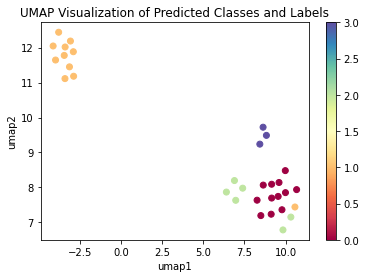

In [13]:
visualize_umap(model, test_loader)

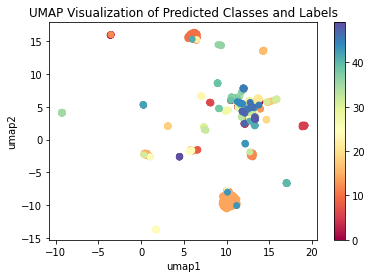

In [14]:
visualize_umap(model, test_loader, mode=2)

In [15]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_pfe.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: -544.1452 Time: 9.1965
Step: [20/53] Epoch [1/20] Loss: -1087.8711 Time: 18.3761
Step: [30/53] Epoch [1/20] Loss: -1631.1083 Time: 27.7784
Step: [40/53] Epoch [1/20] Loss: -2176.1003 Time: 37.0135
Step: [50/53] Epoch [1/20] Loss: -2720.4685 Time: 46.2094
Step: [53/53] Epoch [1/20] Loss: -2884.0408 Time: 48.3464
Epoch [1/20] Loss: -2884.0408 Time: 48.3471 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: -542.8108 Time: 57.5440
Step: [20/53] Epoch [2/20] Loss: -1087.0787 Time: 67.0209
Step: [30/53] Epoch [2/20] Loss: -1629.9780 Time: 76.2507
Step: [40/53] Epoch [2/20] Loss: -2174.5748 Time: 85.4498
Step: [50/53] Epoch [2/20] Loss: -2718.7084 Time: 94.7184
Step: [53/53] Epoch [2/20] Loss: -2883.1650 Time: 96.8528
Epoch [2/20] Loss: -2883.1650 Time: 96.8530 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: -543.7222 Time: 106.3114
Step: [20/53] Epoch [3/20] Loss: -1087.9610 Time: 115.5124
Step: [30/53] Epoch [3/20] Loss: -1632.1811 Time: 124.7034
S

Step: [20/53] Epoch [20/20] Loss: -1088.2572 Time: 939.4776
Step: [30/53] Epoch [20/20] Loss: -1632.3475 Time: 948.6774
Step: [40/53] Epoch [20/20] Loss: -2174.9487 Time: 957.8362
Step: [50/53] Epoch [20/20] Loss: -2718.6179 Time: 967.0623
Step: [53/53] Epoch [20/20] Loss: -2882.7311 Time: 969.1977
Epoch [20/20] Loss: -2882.7311 Time: 969.1978 Learning rate: 1.0000000000000004e-08
Finished Training, Time: 969.1982 Best loss: -2880.7861


In [16]:
model = torch.load('./saved_models/resnet50_lfw50_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [17]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:23<00:00,  1.12it/s]


R@1 : 29.639
R@2 : 40.100
R@4 : 52.179
R@8 : 62.765
R@16 : 72.478
R@32 : 82.939


[0.29638854296388545,
 0.40099626400996263,
 0.5217932752179327,
 0.6276463262764632,
 0.7247820672478207,
 0.8293897882938979]

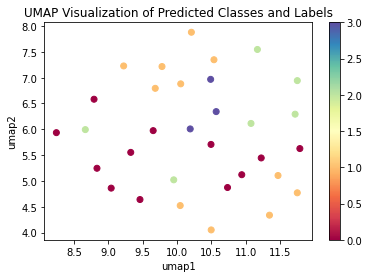

In [18]:
visualize_umap(model, test_loader)

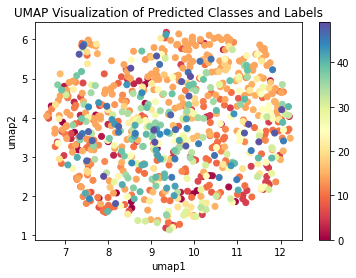

In [19]:
visualize_umap(model, test_loader, mode=2)

In [20]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

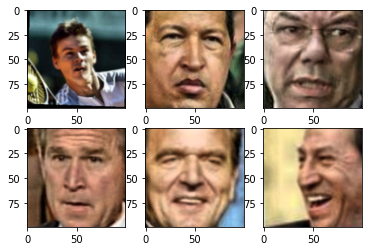

In [21]:
display_images(train_loader, h=2,w=3)

In [22]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8823 Time: 11.9219
Step: [20/53] Epoch [1/20] Loss: 3.5913 Time: 23.7611
Step: [30/53] Epoch [1/20] Loss: 5.2191 Time: 35.5625
Step: [40/53] Epoch [1/20] Loss: 6.7710 Time: 47.5205
Step: [50/53] Epoch [1/20] Loss: 8.3391 Time: 59.3402
Step: [53/53] Epoch [1/20] Loss: 8.7586 Time: 62.0783
Epoch [1/20] Loss: 8.7586 Time: 62.0785 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3893 Time: 73.9281
Step: [20/53] Epoch [2/20] Loss: 2.7673 Time: 85.8914
Step: [30/53] Epoch [2/20] Loss: 4.1652 Time: 97.6172
Step: [40/53] Epoch [2/20] Loss: 5.5320 Time: 109.3435
Step: [50/53] Epoch [2/20] Loss: 6.9597 Time: 121.2750
Step: [53/53] Epoch [2/20] Loss: 7.3577 Time: 124.0121
Epoch [2/20] Loss: 7.3577 Time: 124.0125 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2899 Time: 135.7933
Step: [20/53] Epoch [3/20] Loss: 2.5539 Time: 147.5845
Step: [30/53] Epoch [3/20] Loss: 3.7884 Time: 159.5739
Step: [40/53] Epoch [3/20] Loss: 4.9482 Time: 171.3936
Step: 

In [23]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [24]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:29<00:00,  1.12s/it]


R@1 : 88.667
R@2 : 91.034
R@4 : 92.154
R@8 : 94.645
R@16 : 96.139
R@32 : 97.758


[0.8866749688667497,
 0.9103362391033624,
 0.9215442092154421,
 0.9464508094645081,
 0.9613947696139477,
 0.9775840597758406]

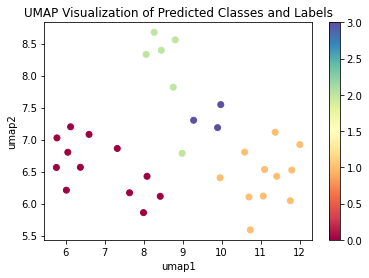

In [25]:
visualize_umap(model, test_loader)

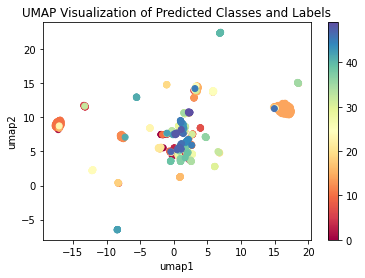

In [26]:
visualize_umap(model, test_loader, mode=2)

In [27]:
model = train_model(model_name='pfe',
                    loss_func_name='mutual_likelihood_score',
                    optimizer='sgd',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_pfe.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: -535.2837 Time: 11.8129
Step: [20/53] Epoch [1/20] Loss: -1072.7376 Time: 23.5184
Step: [30/53] Epoch [1/20] Loss: -1608.5252 Time: 35.1305
Step: [40/53] Epoch [1/20] Loss: -2144.3545 Time: 46.9545
Step: [50/53] Epoch [1/20] Loss: -2681.5287 Time: 58.6017
Step: [53/53] Epoch [1/20] Loss: -2842.5785 Time: 61.3111
Epoch [1/20] Loss: -2842.5785 Time: 61.3115 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: -537.2191 Time: 73.1609
Step: [20/53] Epoch [2/20] Loss: -1073.7076 Time: 84.7496
Step: [30/53] Epoch [2/20] Loss: -1609.9621 Time: 96.3363
Step: [40/53] Epoch [2/20] Loss: -2145.5412 Time: 108.0533
Step: [50/53] Epoch [2/20] Loss: -2680.5155 Time: 119.8363
Step: [53/53] Epoch [2/20] Loss: -2841.7710 Time: 122.5455
Epoch [2/20] Loss: -2841.7710 Time: 122.5458 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: -536.5578 Time: 134.1111
Step: [20/53] Epoch [3/20] Loss: -1072.8495 Time: 145.6646
Step: [30/53] Epoch [3/20] Loss: -1608.9800 Time: 157.4

Step: [20/53] Epoch [20/20] Loss: -1072.8243 Time: 1184.1902
Step: [30/53] Epoch [20/20] Loss: -1608.7800 Time: 1195.8119
Step: [40/53] Epoch [20/20] Loss: -2145.1741 Time: 1207.4330
Step: [50/53] Epoch [20/20] Loss: -2681.2762 Time: 1219.2304
Step: [53/53] Epoch [20/20] Loss: -2840.9078 Time: 1221.9224
Epoch [20/20] Loss: -2840.9078 Time: 1221.9228 Learning rate: 1.0000000000000004e-08
Finished Training, Time: 1221.9229 Best loss: -2840.9022


In [28]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_pfe.ptm')
# evaluate_accuracy(model, test_loader)

In [29]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:29<00:00,  1.12s/it]


R@1 : 26.526
R@2 : 37.360
R@4 : 50.560
R@8 : 62.391
R@16 : 73.225
R@32 : 83.313


[0.26525529265255293,
 0.37359900373599003,
 0.5056039850560399,
 0.6239103362391034,
 0.7322540473225405,
 0.8331257783312578]

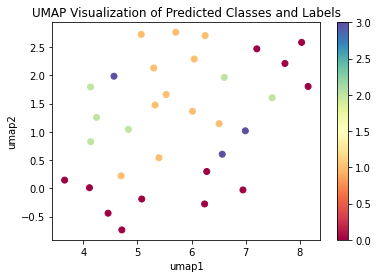

In [30]:
visualize_umap(model, test_loader)

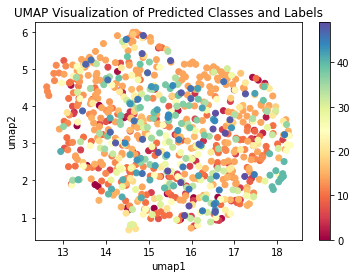

In [31]:
visualize_umap(model, test_loader, mode=2)

In [32]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='s')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='s')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

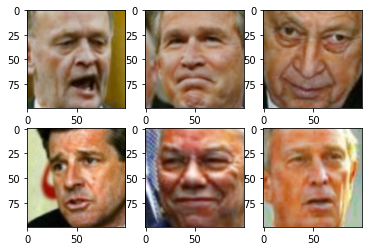

In [33]:
display_images(train_loader, h=2,w=3)

In [34]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist-s_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8291 Time: 11.7281
Step: [20/53] Epoch [1/20] Loss: 3.5481 Time: 23.7145
Step: [30/53] Epoch [1/20] Loss: 5.2286 Time: 35.4755
Step: [40/53] Epoch [1/20] Loss: 6.8459 Time: 47.2763
Step: [50/53] Epoch [1/20] Loss: 8.3984 Time: 59.2941
Step: [53/53] Epoch [1/20] Loss: 8.8438 Time: 62.0432
Epoch [1/20] Loss: 8.8438 Time: 62.0435 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4286 Time: 73.8435
Step: [20/53] Epoch [2/20] Loss: 2.8735 Time: 85.8841
Step: [30/53] Epoch [2/20] Loss: 4.2168 Time: 97.6348
Step: [40/53] Epoch [2/20] Loss: 5.5874 Time: 109.4096
Step: [50/53] Epoch [2/20] Loss: 7.0137 Time: 121.2224
Step: [53/53] Epoch [2/20] Loss: 7.4242 Time: 124.1985
Epoch [2/20] Loss: 7.4242 Time: 124.1987 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3626 Time: 135.9419
Step: [20/53] Epoch [3/20] Loss: 2.6336 Time: 147.7244
Step: [30/53] Epoch [3/20] Loss: 3.9097 Time: 159.7087
Step: [40/53] Epoch [3/20] Loss: 5.1827 Time: 171.4849
Step: 

In [35]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist-s_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [36]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:29<00:00,  1.12s/it]


R@1 : 88.667
R@2 : 90.785
R@4 : 92.154
R@8 : 94.271
R@16 : 96.389
R@32 : 97.634


[0.8866749688667497,
 0.9078455790784558,
 0.9215442092154421,
 0.9427148194271482,
 0.9638854296388543,
 0.9763387297633873]

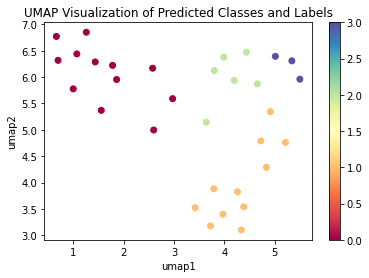

In [37]:
visualize_umap(model, test_loader)

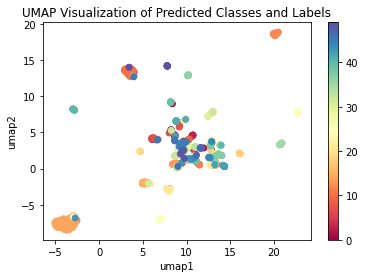

In [38]:
visualize_umap(model, test_loader, mode=2)

In [39]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='sv')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='sv')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

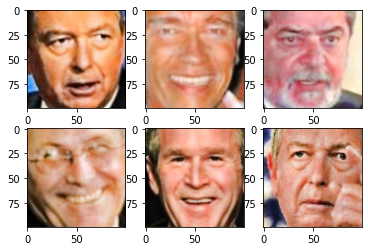

In [40]:
display_images(train_loader, h=2,w=3)

In [41]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist-sv_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8116 Time: 13.9676
Step: [20/53] Epoch [1/20] Loss: 3.5245 Time: 27.6922
Step: [30/53] Epoch [1/20] Loss: 5.1955 Time: 41.4595
Step: [40/53] Epoch [1/20] Loss: 6.8193 Time: 55.3951
Step: [50/53] Epoch [1/20] Loss: 8.4456 Time: 69.1611
Step: [53/53] Epoch [1/20] Loss: 8.8600 Time: 72.3719
Epoch [1/20] Loss: 8.8600 Time: 72.3727 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4713 Time: 86.3573
Step: [20/53] Epoch [2/20] Loss: 2.9285 Time: 100.1165
Step: [30/53] Epoch [2/20] Loss: 4.3644 Time: 113.8650
Step: [40/53] Epoch [2/20] Loss: 5.8178 Time: 127.7789
Step: [50/53] Epoch [2/20] Loss: 7.2551 Time: 141.5491
Step: [53/53] Epoch [2/20] Loss: 7.6476 Time: 144.7546
Epoch [2/20] Loss: 7.6476 Time: 144.7549 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3723 Time: 158.6526
Step: [20/53] Epoch [3/20] Loss: 2.6962 Time: 172.3299
Step: [30/53] Epoch [3/20] Loss: 3.9481 Time: 185.9981
Step: [40/53] Epoch [3/20] Loss: 5.2417 Time: 199.8888
Step

In [42]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist-sv_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [43]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 86.052
R@2 : 88.294
R@4 : 89.539
R@8 : 91.532
R@16 : 93.649
R@32 : 95.641


[0.8605230386052304,
 0.8829389788293898,
 0.8953922789539228,
 0.9153175591531756,
 0.9364881693648817,
 0.9564134495641345]

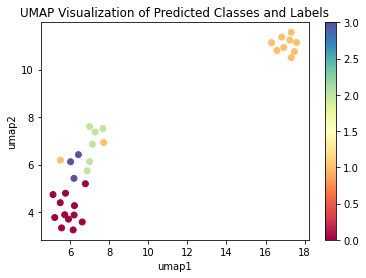

In [44]:
visualize_umap(model, test_loader)

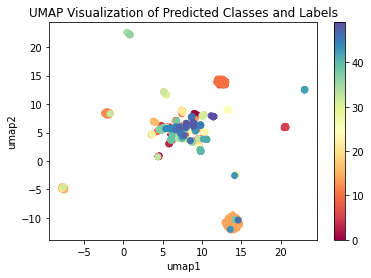

In [45]:
visualize_umap(model, test_loader, mode=2)

In [46]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

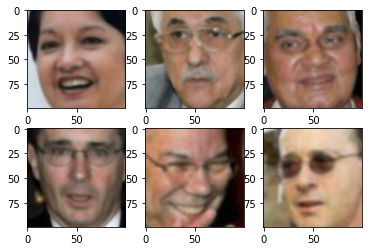

In [47]:
display_images(train_loader, h=2,w=3)

In [48]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8402 Time: 12.2997
Step: [20/53] Epoch [1/20] Loss: 3.5330 Time: 24.8135
Step: [30/53] Epoch [1/20] Loss: 5.1483 Time: 37.1520
Step: [40/53] Epoch [1/20] Loss: 6.7500 Time: 49.4459
Step: [50/53] Epoch [1/20] Loss: 8.2890 Time: 61.9849
Step: [53/53] Epoch [1/20] Loss: 8.7135 Time: 64.8666
Epoch [1/20] Loss: 8.7135 Time: 64.8668 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3981 Time: 77.2197
Step: [20/53] Epoch [2/20] Loss: 2.8277 Time: 89.5307
Step: [30/53] Epoch [2/20] Loss: 4.2032 Time: 102.0190
Step: [40/53] Epoch [2/20] Loss: 5.5766 Time: 114.3288
Step: [50/53] Epoch [2/20] Loss: 6.9841 Time: 126.6364
Step: [53/53] Epoch [2/20] Loss: 7.4060 Time: 129.5247
Epoch [2/20] Loss: 7.4060 Time: 129.5250 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3328 Time: 142.0569
Step: [20/53] Epoch [3/20] Loss: 2.7073 Time: 154.3519
Step: [30/53] Epoch [3/20] Loss: 4.0101 Time: 166.8587
Step: [40/53] Epoch [3/20] Loss: 5.2883 Time: 179.1529
Step:

In [49]:
model = torch.load('./saved_models/resnet50_lfw50_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [50]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:30<00:00,  1.18s/it]


R@1 : 92.653
R@2 : 93.649
R@4 : 94.894
R@8 : 96.015
R@16 : 96.762
R@32 : 98.132


[0.9265255292652553,
 0.9364881693648817,
 0.9489414694894147,
 0.9601494396014943,
 0.9676214196762142,
 0.9813200498132005]

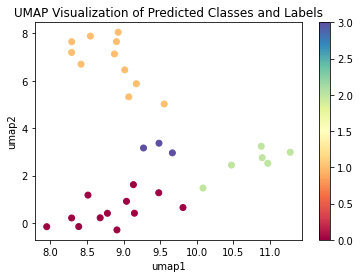

In [51]:
visualize_umap(model, test_loader)

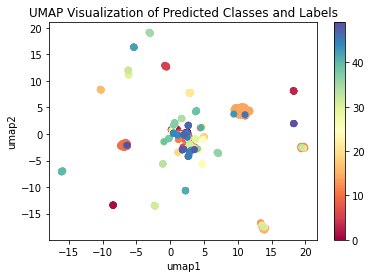

In [52]:
visualize_umap(model, test_loader, mode=2)

In [53]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

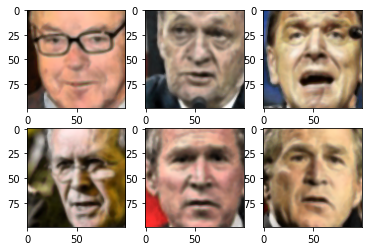

In [54]:
display_images(train_loader, h=2,w=3)

In [55]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.9070 Time: 14.8710
Step: [20/53] Epoch [1/20] Loss: 3.6518 Time: 29.9903
Step: [30/53] Epoch [1/20] Loss: 5.2956 Time: 44.9567
Step: [40/53] Epoch [1/20] Loss: 6.9050 Time: 60.0524
Step: [50/53] Epoch [1/20] Loss: 8.4847 Time: 74.9369
Step: [53/53] Epoch [1/20] Loss: 8.9435 Time: 78.4119
Epoch [1/20] Loss: 8.9435 Time: 78.4122 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4404 Time: 93.5486
Step: [20/53] Epoch [2/20] Loss: 2.8775 Time: 108.4597
Step: [30/53] Epoch [2/20] Loss: 4.2944 Time: 123.3265
Step: [40/53] Epoch [2/20] Loss: 5.6712 Time: 138.4008
Step: [50/53] Epoch [2/20] Loss: 7.0415 Time: 153.2552
Step: [53/53] Epoch [2/20] Loss: 7.4582 Time: 156.7234
Epoch [2/20] Loss: 7.4582 Time: 156.7237 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2935 Time: 171.8849
Step: [20/53] Epoch [3/20] Loss: 2.5719 Time: 186.8036
Step: [30/53] Epoch [3/20] Loss: 3.8354 Time: 201.8933
Step: [40/53] Epoch [3/20] Loss: 5.1012 Time: 216.7354
Step

In [56]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [57]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:37<00:00,  1.43s/it]


R@1 : 88.917
R@2 : 91.034
R@4 : 92.403
R@8 : 93.898
R@16 : 95.392
R@32 : 97.011


[0.8891656288916563,
 0.9103362391033624,
 0.9240348692403487,
 0.9389788293897883,
 0.9539227895392279,
 0.9701120797011208]

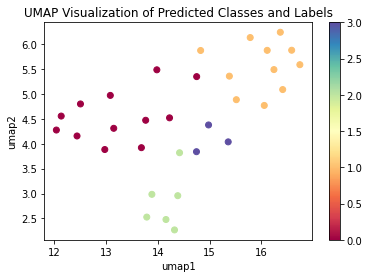

In [58]:
visualize_umap(model, test_loader)

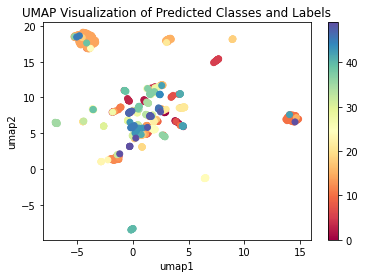

In [59]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

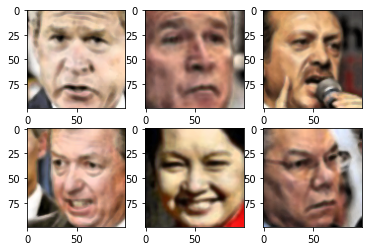

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_median-before_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8073 Time: 17.5170
Step: [20/53] Epoch [1/20] Loss: 3.5369 Time: 32.3750
Step: [30/53] Epoch [1/20] Loss: 5.1907 Time: 47.1276
Step: [40/53] Epoch [1/20] Loss: 6.8074 Time: 62.0206
Step: [50/53] Epoch [1/20] Loss: 8.3772 Time: 76.7174
Step: [53/53] Epoch [1/20] Loss: 8.8145 Time: 80.1563
Epoch [1/20] Loss: 8.8145 Time: 80.1568 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4999 Time: 95.0090
Step: [20/53] Epoch [2/20] Loss: 2.9194 Time: 109.7323
Step: [30/53] Epoch [2/20] Loss: 4.3122 Time: 124.6251
Step: [40/53] Epoch [2/20] Loss: 5.6351 Time: 139.3604
Step: [50/53] Epoch [2/20] Loss: 6.9669 Time: 154.0774
Step: [53/53] Epoch [2/20] Loss: 7.3163 Time: 157.4691
Epoch [2/20] Loss: 7.3163 Time: 157.4699 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3118 Time: 172.3224
Step: [20/53] Epoch [3/20] Loss: 2.5934 Time: 187.0776
Step: [30/53] Epoch [3/20] Loss: 3.8071 Time: 202.0085
Step: [40/53] Epoch [3/20] Loss: 5.0310 Time: 216.7361
Step

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_median-before_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:36<00:00,  1.42s/it]


R@1 : 84.558
R@2 : 86.800
R@4 : 88.792
R@8 : 92.030
R@16 : 94.271
R@32 : 96.762


[0.8455790784557908,
 0.8679950186799502,
 0.887920298879203,
 0.9202988792029888,
 0.9427148194271482,
 0.9676214196762142]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


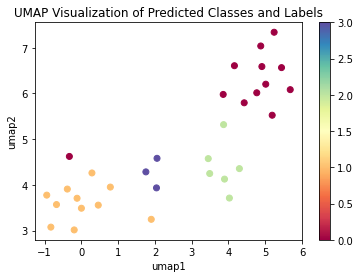

In [8]:
visualize_umap(model, test_loader)

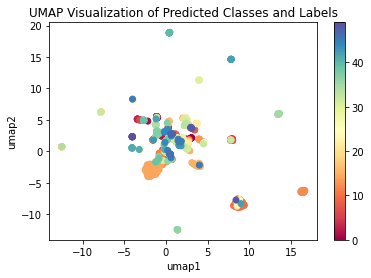

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', median=True, median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', median=True, median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

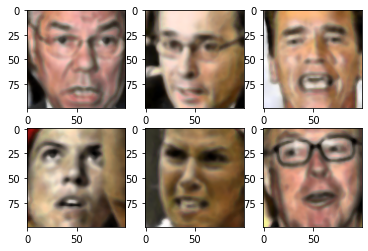

In [11]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_median_median-before_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8406 Time: 17.9325
Step: [20/53] Epoch [1/20] Loss: 3.5800 Time: 36.0165
Step: [30/53] Epoch [1/20] Loss: 5.2767 Time: 53.9024
Step: [40/53] Epoch [1/20] Loss: 6.8711 Time: 71.9775
Step: [50/53] Epoch [1/20] Loss: 8.4453 Time: 89.8170
Step: [53/53] Epoch [1/20] Loss: 8.8680 Time: 93.9458
Epoch [1/20] Loss: 8.8680 Time: 93.9461 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4323 Time: 111.9430
Step: [20/53] Epoch [2/20] Loss: 2.7964 Time: 129.7519
Step: [30/53] Epoch [2/20] Loss: 4.1499 Time: 147.8845
Step: [40/53] Epoch [2/20] Loss: 5.4947 Time: 165.7554
Step: [50/53] Epoch [2/20] Loss: 6.8720 Time: 183.8526
Step: [53/53] Epoch [2/20] Loss: 7.2661 Time: 188.0285
Epoch [2/20] Loss: 7.2661 Time: 188.0287 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2901 Time: 205.9296
Step: [20/53] Epoch [3/20] Loss: 2.5358 Time: 223.9795
Step: [30/53] Epoch [3/20] Loss: 3.7284 Time: 241.8722
Step: [40/53] Epoch [3/20] Loss: 4.9376 Time: 259.8775
Ste

In [13]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_median_median-before_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:44<00:00,  1.70s/it]


R@1 : 86.426
R@2 : 88.917
R@4 : 90.535
R@8 : 93.151
R@16 : 95.766
R@32 : 97.385


[0.8642590286425903,
 0.8891656288916563,
 0.9053549190535491,
 0.9315068493150684,
 0.9576587795765878,
 0.9738480697384807]

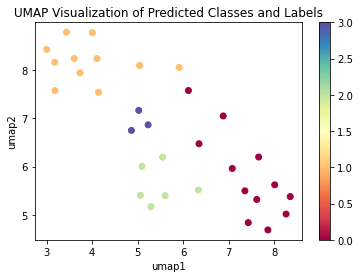

In [15]:
visualize_umap(model, test_loader)

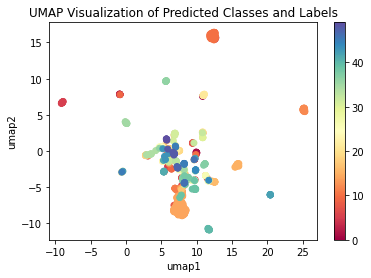

In [16]:
visualize_umap(model, test_loader, mode=2)

In [27]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', clip_limit=0.001, nbins=32, median=True, median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', clip_limit=0.001, nbins=32, median=True, median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

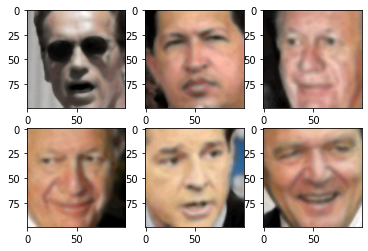

In [28]:
display_images(train_loader, h=2,w=3)

In [29]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_0001cliplimit_32nbins_median_median-before_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8516 Time: 21.6086
Step: [20/53] Epoch [1/20] Loss: 3.5809 Time: 43.3505
Step: [30/53] Epoch [1/20] Loss: 5.1690 Time: 64.7971
Step: [40/53] Epoch [1/20] Loss: 6.8005 Time: 86.4940
Step: [50/53] Epoch [1/20] Loss: 8.3253 Time: 108.1188
Step: [53/53] Epoch [1/20] Loss: 8.7194 Time: 113.0772
Epoch [1/20] Loss: 8.7194 Time: 113.0774 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3886 Time: 134.5328
Step: [20/53] Epoch [2/20] Loss: 2.7792 Time: 156.2533
Step: [30/53] Epoch [2/20] Loss: 4.1580 Time: 177.7782
Step: [40/53] Epoch [2/20] Loss: 5.5880 Time: 199.4787
Step: [50/53] Epoch [2/20] Loss: 6.9498 Time: 220.9314
Step: [53/53] Epoch [2/20] Loss: 7.3622 Time: 226.1394
Epoch [2/20] Loss: 7.3622 Time: 226.1396 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2792 Time: 247.9100
Step: [20/53] Epoch [3/20] Loss: 2.5753 Time: 269.7122
Step: [30/53] Epoch [3/20] Loss: 3.9405 Time: 291.2017
Step: [40/53] Epoch [3/20] Loss: 5.2428 Time: 312.8680


In [30]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_0001cliplimit_32nbins_median_median-before_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [31]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:53<00:00,  2.07s/it]


R@1 : 88.667
R@2 : 90.535
R@4 : 92.279
R@8 : 92.902
R@16 : 94.521
R@32 : 96.638


[0.8866749688667497,
 0.9053549190535491,
 0.9227895392278954,
 0.9290161892901619,
 0.9452054794520548,
 0.9663760896637609]

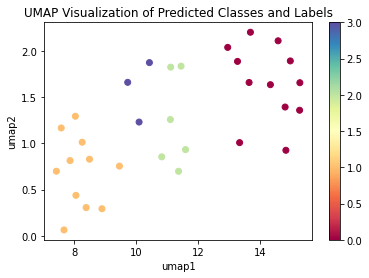

In [32]:
visualize_umap(model, test_loader)

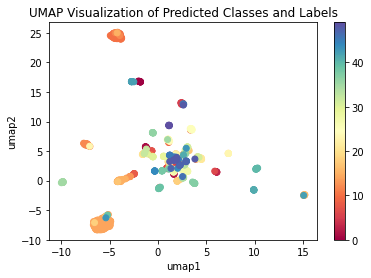

In [33]:
visualize_umap(model, test_loader, mode=2)

In [36]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', clip_limit=0.001, nbins=512, median=True, median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', clip_limit=0.001, nbins=512, median=True, median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

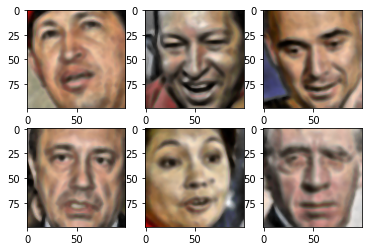

In [37]:
display_images(train_loader, h=2,w=3)

In [39]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_0001cliplimit_512nbins_median_median-before_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8441 Time: 19.8383
Step: [20/53] Epoch [1/20] Loss: 3.5850 Time: 39.7279
Step: [30/53] Epoch [1/20] Loss: 5.2490 Time: 59.4814
Step: [40/53] Epoch [1/20] Loss: 6.8692 Time: 79.3617
Step: [50/53] Epoch [1/20] Loss: 8.4970 Time: 99.0441
Step: [53/53] Epoch [1/20] Loss: 8.9222 Time: 103.6337
Epoch [1/20] Loss: 8.9222 Time: 103.6343 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4373 Time: 123.5378
Step: [20/53] Epoch [2/20] Loss: 2.8814 Time: 143.3927
Step: [30/53] Epoch [2/20] Loss: 4.2845 Time: 163.0727
Step: [40/53] Epoch [2/20] Loss: 5.7264 Time: 182.9907
Step: [50/53] Epoch [2/20] Loss: 7.0954 Time: 202.6820
Step: [53/53] Epoch [2/20] Loss: 7.4778 Time: 207.2819
Epoch [2/20] Loss: 7.4778 Time: 207.2824 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2365 Time: 227.1262
Step: [20/53] Epoch [3/20] Loss: 2.5394 Time: 246.8792
Step: [30/53] Epoch [3/20] Loss: 3.7878 Time: 266.7397
Step: [40/53] Epoch [3/20] Loss: 5.0901 Time: 286.4642
S

In [40]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_0001cliplimit_512nbins_median_median-before_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [41]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:49<00:00,  1.90s/it]


R@1 : 87.049
R@2 : 89.788
R@4 : 92.154
R@8 : 94.271
R@16 : 96.513
R@32 : 97.883


[0.8704856787048568,
 0.8978829389788294,
 0.9215442092154421,
 0.9427148194271482,
 0.9651307596513076,
 0.9788293897882939]

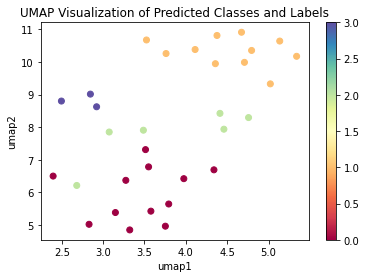

In [42]:
visualize_umap(model, test_loader)

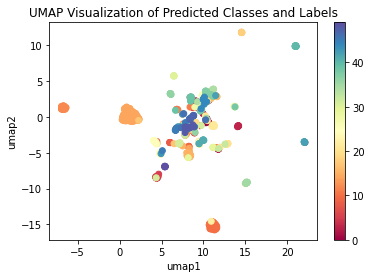

In [43]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


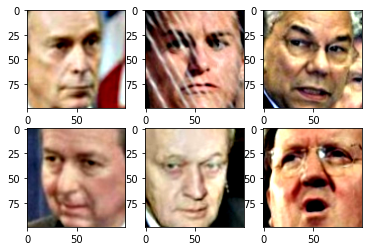

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8426 Time: 13.1732
Step: [20/53] Epoch [1/20] Loss: 3.5340 Time: 23.9035
Step: [30/53] Epoch [1/20] Loss: 5.1595 Time: 34.6591
Step: [40/53] Epoch [1/20] Loss: 6.7532 Time: 45.5949
Step: [50/53] Epoch [1/20] Loss: 8.2582 Time: 56.2747
Step: [53/53] Epoch [1/20] Loss: 8.6748 Time: 58.7851
Epoch [1/20] Loss: 8.6748 Time: 58.7852 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3533 Time: 69.4528
Step: [20/53] Epoch [2/20] Loss: 2.7776 Time: 80.4507
Step: [30/53] Epoch [2/20] Loss: 4.0961 Time: 91.2201
Step: [40/53] Epoch [2/20] Loss: 5.3793 Time: 102.0196
Step: [50/53] Epoch [2/20] Loss: 6.6868 Time: 113.0261
Step: [53/53] Epoch [2/20] Loss: 7.0684 Time: 115.5161
Epoch [2/20] Loss: 7.0684 Time: 115.5166 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.1966 Time: 126.2850
Step: [20/53] Epoch [3/20] Loss: 2.4214 Time: 137.0533
Step: [30/53] Epoch [3/20] Loss: 3.6135 Time: 148.0361
Step: [40/53] Epoch [3/20] Loss: 4.8184 Time: 158.7713
Step: 

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.03s/it]


R@1 : 90.286
R@2 : 92.279
R@4 : 93.524
R@8 : 94.770
R@16 : 96.513
R@32 : 98.381


[0.9028642590286425,
 0.9227895392278954,
 0.9352428393524284,
 0.9476961394769614,
 0.9651307596513076,
 0.9838107098381071]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


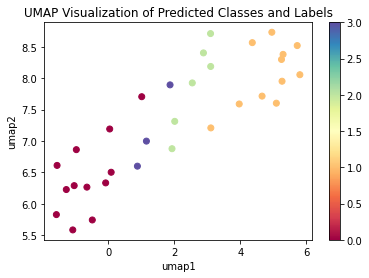

In [8]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


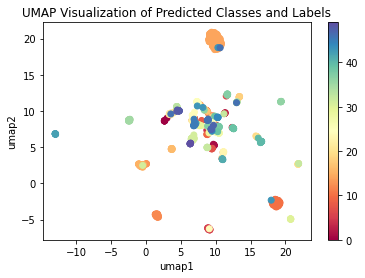

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


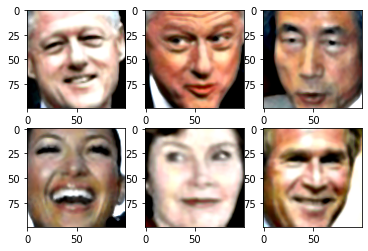

In [11]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8268 Time: 13.7121
Step: [20/53] Epoch [1/20] Loss: 3.5651 Time: 27.6364
Step: [30/53] Epoch [1/20] Loss: 5.2718 Time: 41.3203
Step: [40/53] Epoch [1/20] Loss: 6.8374 Time: 54.9714
Step: [50/53] Epoch [1/20] Loss: 8.3665 Time: 68.8203
Step: [53/53] Epoch [1/20] Loss: 8.7697 Time: 72.0027
Epoch [1/20] Loss: 8.7697 Time: 72.0030 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4255 Time: 85.6573
Step: [20/53] Epoch [2/20] Loss: 2.8353 Time: 99.5310
Step: [30/53] Epoch [2/20] Loss: 4.2324 Time: 113.2209
Step: [40/53] Epoch [2/20] Loss: 5.6590 Time: 126.9475
Step: [50/53] Epoch [2/20] Loss: 7.0739 Time: 140.9191
Step: [53/53] Epoch [2/20] Loss: 7.4705 Time: 144.1076
Epoch [2/20] Loss: 7.4705 Time: 144.1083 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2050 Time: 157.8847
Step: [20/53] Epoch [3/20] Loss: 2.5082 Time: 171.7868
Step: [30/53] Epoch [3/20] Loss: 3.7433 Time: 185.4804
Step: [40/53] Epoch [3/20] Loss: 4.9681 Time: 199.3765
Step:

In [13]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 90.037
R@2 : 91.656
R@4 : 92.653
R@8 : 93.773
R@16 : 96.139
R@32 : 98.007


[0.900373599003736,
 0.9165628891656289,
 0.9265255292652553,
 0.937733499377335,
 0.9613947696139477,
 0.9800747198007472]

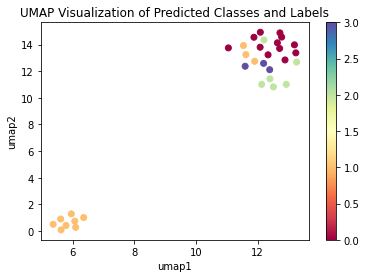

In [15]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


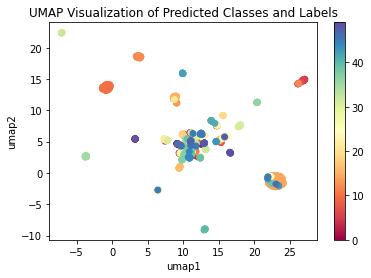

In [16]:
visualize_umap(model, test_loader, mode=2)

In [22]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


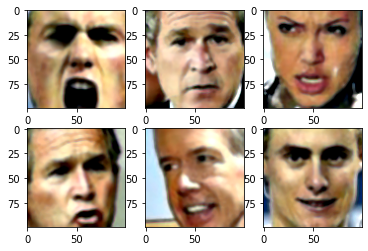

In [23]:
display_images(train_loader, h=2,w=3)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-after_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8484 Time: 13.7184
Step: [20/53] Epoch [1/20] Loss: 3.5829 Time: 27.5674
Step: [30/53] Epoch [1/20] Loss: 5.1775 Time: 41.2714
Step: [40/53] Epoch [1/20] Loss: 6.7719 Time: 55.1153
Step: [50/53] Epoch [1/20] Loss: 8.2879 Time: 68.7781
Step: [53/53] Epoch [1/20] Loss: 8.6749 Time: 71.9815
Epoch [1/20] Loss: 8.6749 Time: 71.9820 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3729 Time: 85.6720
Step: [20/53] Epoch [2/20] Loss: 2.7200 Time: 99.4822
Step: [30/53] Epoch [2/20] Loss: 4.0520 Time: 113.1453
Step: [40/53] Epoch [2/20] Loss: 5.3736 Time: 126.8548
Step: [50/53] Epoch [2/20] Loss: 6.7256 Time: 140.6915
Step: [53/53] Epoch [2/20] Loss: 7.0978 Time: 143.8895
Epoch [2/20] Loss: 7.0978 Time: 143.8899 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2459 Time: 157.5614
Step: [20/53] Epoch [3/20] Loss: 2.4729 Time: 171.4362
Step: [30/53] Epoch [3/20] Loss: 3.6398 Time: 185.0781
Step: [40/53] Epoch [3/20] Loss: 4.8413 Time: 198.9465
Step:

In [24]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-after_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [25]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:33<00:00,  1.31s/it]


R@1 : 91.407
R@2 : 92.403
R@4 : 93.649
R@8 : 95.019
R@16 : 97.260
R@32 : 97.883


[0.9140722291407223,
 0.9240348692403487,
 0.9364881693648817,
 0.950186799501868,
 0.9726027397260274,
 0.9788293897882939]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


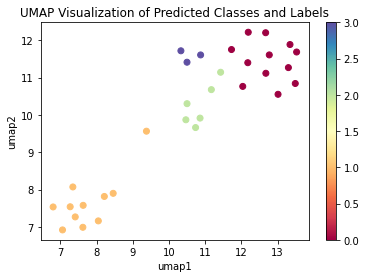

In [13]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


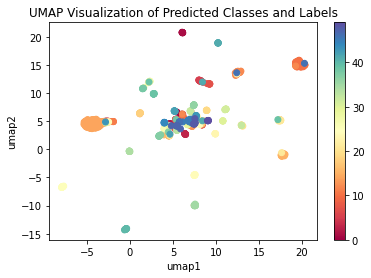

In [14]:
visualize_umap(model, test_loader, mode=2)

In [15]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True, median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True, median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


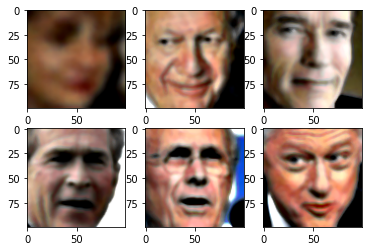

In [16]:
display_images(train_loader, h=2,w=3)

In [17]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median-before_unsharp_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8634 Time: 16.6249
Step: [20/53] Epoch [1/20] Loss: 3.5859 Time: 33.3126
Step: [30/53] Epoch [1/20] Loss: 5.2501 Time: 50.1339
Step: [40/53] Epoch [1/20] Loss: 6.8759 Time: 66.7975
Step: [50/53] Epoch [1/20] Loss: 8.3907 Time: 83.7213
Step: [53/53] Epoch [1/20] Loss: 8.8118 Time: 87.5993
Epoch [1/20] Loss: 8.8118 Time: 87.5995 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4250 Time: 104.2448
Step: [20/53] Epoch [2/20] Loss: 2.8212 Time: 121.1190
Step: [30/53] Epoch [2/20] Loss: 4.2022 Time: 137.8416
Step: [40/53] Epoch [2/20] Loss: 5.6189 Time: 154.6892
Step: [50/53] Epoch [2/20] Loss: 6.9894 Time: 171.2998
Step: [53/53] Epoch [2/20] Loss: 7.3470 Time: 175.1430
Epoch [2/20] Loss: 7.3470 Time: 175.1438 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3577 Time: 192.0104
Step: [20/53] Epoch [3/20] Loss: 2.5835 Time: 208.6409
Step: [30/53] Epoch [3/20] Loss: 3.8932 Time: 225.4572
Step: [40/53] Epoch [3/20] Loss: 5.1639 Time: 242.0944
Ste

In [18]:
model = torch.load('./saved_models/resnet50_lfw50_median-before_unsharp_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [19]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:41<00:00,  1.59s/it]


R@1 : 85.803
R@2 : 88.792
R@4 : 90.162
R@8 : 91.905
R@16 : 94.271
R@32 : 95.890


[0.8580323785803238,
 0.887920298879203,
 0.9016189290161893,
 0.9190535491905355,
 0.9427148194271482,
 0.958904109589041]

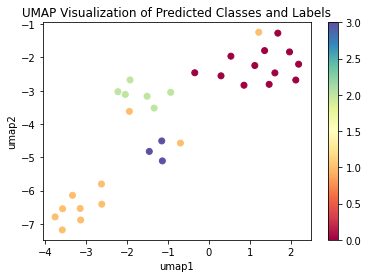

In [20]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


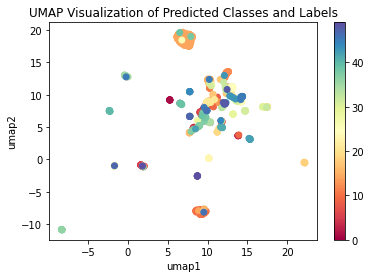

In [21]:
visualize_umap(model, test_loader, mode=2)

In [27]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True, unsharp_after=True, unsharp_radius=3, unsharp_amount=.5)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True, median=True, unsharp_after=True, unsharp_radius=3, unsharp_amount=.5)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

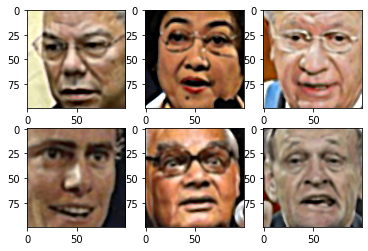

In [28]:
display_images(train_loader, h=2,w=3)

In [ ]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_median_unsharp-after_unsharp-radius3_unsharp-amount05_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8475 Time: 13.0387
Step: [20/53] Epoch [1/20] Loss: 3.5840 Time: 26.2560
Step: [30/53] Epoch [1/20] Loss: 5.2488 Time: 39.2669
Step: [40/53] Epoch [1/20] Loss: 6.8104 Time: 52.3421
Step: [50/53] Epoch [1/20] Loss: 8.3705 Time: 65.4397
Step: [53/53] Epoch [1/20] Loss: 8.7686 Time: 68.4565
Epoch [1/20] Loss: 8.7686 Time: 68.4569 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4209 Time: 81.3963
Step: [20/53] Epoch [2/20] Loss: 2.8788 Time: 94.5735
Step: [30/53] Epoch [2/20] Loss: 4.3321 Time: 107.5484
Step: [40/53] Epoch [2/20] Loss: 5.6248 Time: 120.5281
Step: [50/53] Epoch [2/20] Loss: 7.0015 Time: 133.7068
Step: [53/53] Epoch [2/20] Loss: 7.3985 Time: 136.7356
Epoch [2/20] Loss: 7.3985 Time: 136.7361 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2424 Time: 149.6958
Step: [20/53] Epoch [3/20] Loss: 2.4954 Time: 162.8960
Step: [30/53] Epoch [3/20] Loss: 3.7544 Time: 175.8649
Step: [40/53] Epoch [3/20] Loss: 5.0040 Time: 188.9128
Step:

In [34]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_median_unsharp-after_unsharp-radius3_unsharp-amount05_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [35]:
evaluate_cos(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')
100%|██████████| 26/26 [00:32<00:00,  1.24s/it]


R@1 : 86.177
R@2 : 88.792
R@4 : 91.283
R@8 : 92.653
R@16 : 95.268
R@32 : 97.136


[0.8617683686176837,
 0.887920298879203,
 0.912826899128269,
 0.9265255292652553,
 0.9526774595267746,
 0.9713574097135741]

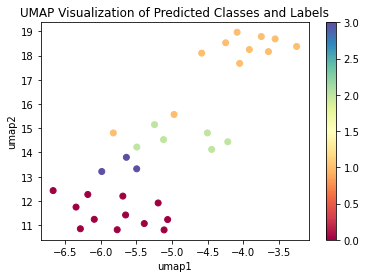

In [36]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


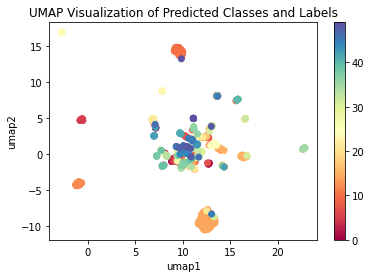

In [37]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

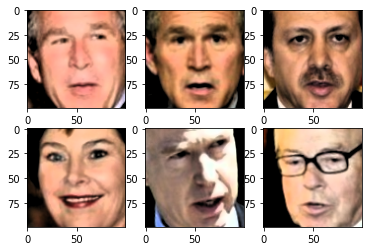

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-v_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8335 Time: 13.3612
Step: [20/53] Epoch [1/20] Loss: 3.5307 Time: 24.1773
Step: [30/53] Epoch [1/20] Loss: 5.2115 Time: 35.0219
Step: [40/53] Epoch [1/20] Loss: 6.7736 Time: 46.0337
Step: [50/53] Epoch [1/20] Loss: 8.2471 Time: 56.8510
Step: [53/53] Epoch [1/20] Loss: 8.7199 Time: 59.3874
Epoch [1/20] Loss: 8.7199 Time: 59.3878 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3630 Time: 70.2321
Step: [20/53] Epoch [2/20] Loss: 2.6808 Time: 81.2295
Step: [30/53] Epoch [2/20] Loss: 4.0299 Time: 92.0821
Step: [40/53] Epoch [2/20] Loss: 5.4702 Time: 102.9177
Step: [50/53] Epoch [2/20] Loss: 6.8746 Time: 113.9233
Step: [53/53] Epoch [2/20] Loss: 7.2568 Time: 116.4368
Epoch [2/20] Loss: 7.2568 Time: 116.4370 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2839 Time: 127.1404
Step: [20/53] Epoch [3/20] Loss: 2.4902 Time: 137.9124
Step: [30/53] Epoch [3/20] Loss: 3.6986 Time: 148.8529
Step: [40/53] Epoch [3/20] Loss: 4.9595 Time: 159.5935
Step: 

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-v_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


R@1 : 88.917
R@2 : 91.158
R@4 : 92.154
R@8 : 94.022
R@16 : 95.517
R@32 : 97.011


[0.8891656288916563,
 0.9115815691158157,
 0.9215442092154421,
 0.9402241594022416,
 0.9551681195516812,
 0.9701120797011208]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


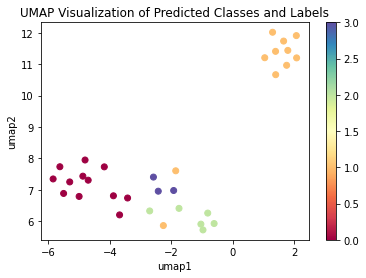

In [8]:
visualize_umap(model, test_loader)

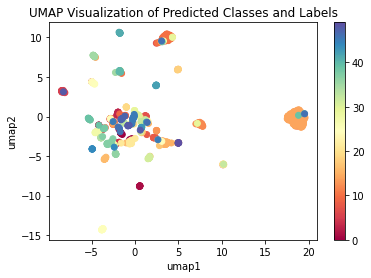

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

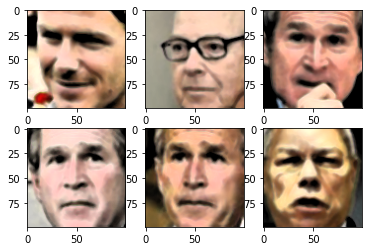

In [11]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-v-after_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8296 Time: 13.9562
Step: [20/53] Epoch [1/20] Loss: 3.6591 Time: 27.7464
Step: [30/53] Epoch [1/20] Loss: 5.2859 Time: 41.7137
Step: [40/53] Epoch [1/20] Loss: 6.9098 Time: 55.4451
Step: [50/53] Epoch [1/20] Loss: 8.4936 Time: 69.1938
Step: [53/53] Epoch [1/20] Loss: 8.9085 Time: 72.3932
Epoch [1/20] Loss: 8.9085 Time: 72.3935 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.5006 Time: 86.3845
Step: [20/53] Epoch [2/20] Loss: 2.8798 Time: 100.1868
Step: [30/53] Epoch [2/20] Loss: 4.2523 Time: 113.8983
Step: [40/53] Epoch [2/20] Loss: 5.6025 Time: 127.8593
Step: [50/53] Epoch [2/20] Loss: 7.0408 Time: 141.6284
Step: [53/53] Epoch [2/20] Loss: 7.3922 Time: 144.8516
Epoch [2/20] Loss: 7.3922 Time: 144.8518 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2885 Time: 158.8348
Step: [20/53] Epoch [3/20] Loss: 2.5382 Time: 172.5734
Step: [30/53] Epoch [3/20] Loss: 3.8673 Time: 186.3571
Step: [40/53] Epoch [3/20] Loss: 5.1414 Time: 200.3164
Step

In [13]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-v-after_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 90.535
R@2 : 92.403
R@4 : 93.400
R@8 : 94.396
R@16 : 95.890
R@32 : 97.011


[0.9053549190535491,
 0.9240348692403487,
 0.933997509339975,
 0.9439601494396015,
 0.958904109589041,
 0.9701120797011208]

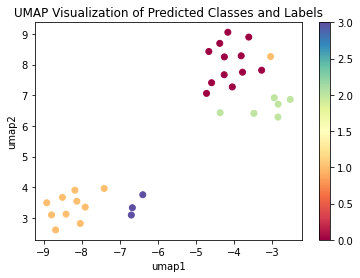

In [15]:
visualize_umap(model, test_loader)

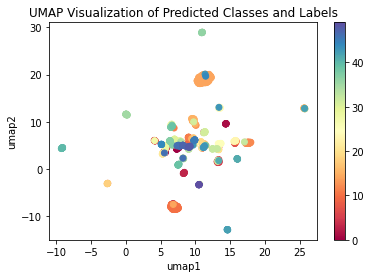

In [16]:
visualize_umap(model, test_loader, mode=2)

In [4]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_radius=3, unsharp_amount=1)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_radius=3, unsharp_amount=1)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


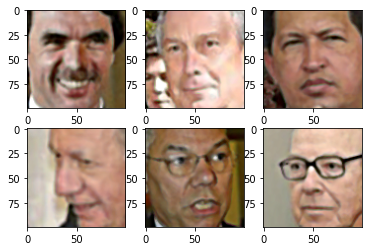

In [5]:
display_images(train_loader, h=2,w=3)

In [6]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-after(radius3,amount1)_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8209 Time: 15.1052
Step: [20/53] Epoch [1/20] Loss: 3.5043 Time: 27.7970
Step: [30/53] Epoch [1/20] Loss: 5.1786 Time: 40.3934
Step: [40/53] Epoch [1/20] Loss: 6.7414 Time: 53.1462
Step: [50/53] Epoch [1/20] Loss: 8.2618 Time: 65.6862
Step: [53/53] Epoch [1/20] Loss: 8.7436 Time: 68.6119
Epoch [1/20] Loss: 8.7436 Time: 68.6121 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4449 Time: 81.1786
Step: [20/53] Epoch [2/20] Loss: 2.8735 Time: 93.8810
Step: [30/53] Epoch [2/20] Loss: 4.2538 Time: 106.3851
Step: [40/53] Epoch [2/20] Loss: 5.6454 Time: 119.0807
Step: [50/53] Epoch [2/20] Loss: 7.0352 Time: 131.6092
Step: [53/53] Epoch [2/20] Loss: 7.3963 Time: 134.5224
Epoch [2/20] Loss: 7.3963 Time: 134.5229 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2345 Time: 147.0603
Step: [20/53] Epoch [3/20] Loss: 2.4695 Time: 159.7691
Step: [30/53] Epoch [3/20] Loss: 3.6987 Time: 172.2973
Step: [40/53] Epoch [3/20] Loss: 4.9496 Time: 184.8069
Step:

In [7]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-after(radius3,amount1)_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [8]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:31<00:00,  1.20s/it]


R@1 : 88.917
R@2 : 90.411
R@4 : 92.154
R@8 : 94.022
R@16 : 95.392
R@32 : 97.260


[0.8891656288916563,
 0.9041095890410958,
 0.9215442092154421,
 0.9402241594022416,
 0.9539227895392279,
 0.9726027397260274]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


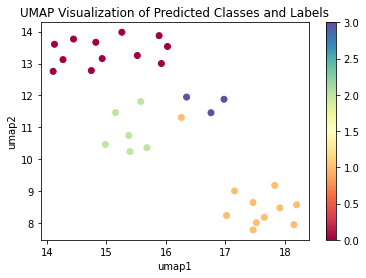

In [9]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


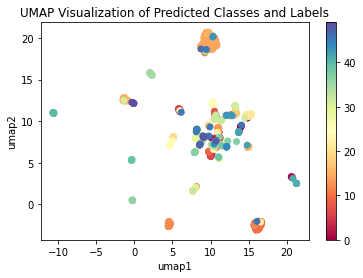

In [10]:
visualize_umap(model, test_loader, mode=2)

In [26]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_amount=.1)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_amount=.1)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

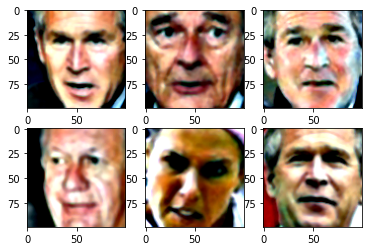

In [27]:
display_images(train_loader, h=2,w=3)

In [13]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-after(amount01)_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.9091 Time: 13.8486
Step: [20/53] Epoch [1/20] Loss: 3.6222 Time: 27.8194
Step: [30/53] Epoch [1/20] Loss: 5.2613 Time: 41.5420
Step: [40/53] Epoch [1/20] Loss: 6.8490 Time: 55.2472
Step: [50/53] Epoch [1/20] Loss: 8.3781 Time: 69.1373
Step: [53/53] Epoch [1/20] Loss: 8.7751 Time: 72.3388
Epoch [1/20] Loss: 8.7751 Time: 72.3391 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4294 Time: 85.9562
Step: [20/53] Epoch [2/20] Loss: 2.8355 Time: 99.7804
Step: [30/53] Epoch [2/20] Loss: 4.2469 Time: 113.4567
Step: [40/53] Epoch [2/20] Loss: 5.6384 Time: 127.1676
Step: [50/53] Epoch [2/20] Loss: 7.0453 Time: 141.0760
Step: [53/53] Epoch [2/20] Loss: 7.4466 Time: 144.2439
Epoch [2/20] Loss: 7.4466 Time: 144.2443 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3207 Time: 157.9153
Step: [20/53] Epoch [3/20] Loss: 2.5755 Time: 171.7822
Step: [30/53] Epoch [3/20] Loss: 3.8433 Time: 185.4808
Step: [40/53] Epoch [3/20] Loss: 5.1751 Time: 199.1692
Step:

In [18]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-after(amount01)_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [19]:
evaluate_cos(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')
100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 87.173
R@2 : 89.913
R@4 : 91.656
R@8 : 93.026
R@16 : 94.770
R@32 : 96.638


[0.8717310087173101,
 0.8991282689912827,
 0.9165628891656289,
 0.9302615193026152,
 0.9476961394769614,
 0.9663760896637609]

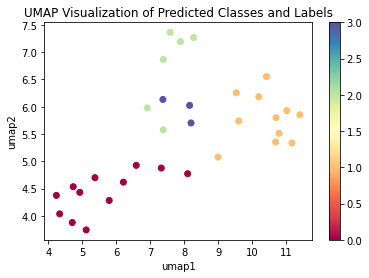

In [20]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


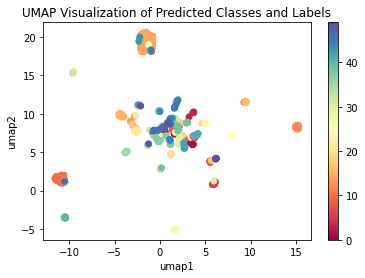

In [21]:
visualize_umap(model, test_loader, mode=2)

In [28]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_amount=2)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True, unsharp_amount=2)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

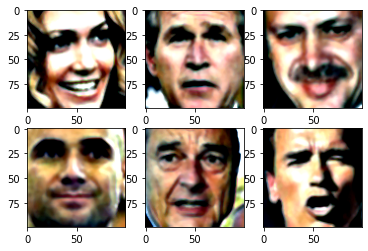

In [29]:
display_images(train_loader, h=2,w=3)

In [30]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp-after(amount2)_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8629 Time: 13.7502
Step: [20/53] Epoch [1/20] Loss: 3.5837 Time: 27.6172
Step: [30/53] Epoch [1/20] Loss: 5.2531 Time: 41.2941
Step: [40/53] Epoch [1/20] Loss: 6.8946 Time: 55.1697
Step: [50/53] Epoch [1/20] Loss: 8.4418 Time: 68.8307
Step: [53/53] Epoch [1/20] Loss: 8.8517 Time: 72.0077
Epoch [1/20] Loss: 8.8517 Time: 72.0084 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4716 Time: 85.9024
Step: [20/53] Epoch [2/20] Loss: 2.7907 Time: 99.5831
Step: [30/53] Epoch [2/20] Loss: 4.1673 Time: 113.2532
Step: [40/53] Epoch [2/20] Loss: 5.6143 Time: 127.0991
Step: [50/53] Epoch [2/20] Loss: 7.0599 Time: 140.7235
Step: [53/53] Epoch [2/20] Loss: 7.4365 Time: 143.9011
Epoch [2/20] Loss: 7.4365 Time: 143.9015 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2798 Time: 157.7992
Step: [20/53] Epoch [3/20] Loss: 2.5472 Time: 171.4825
Step: [30/53] Epoch [3/20] Loss: 3.7719 Time: 185.1120
Step: [40/53] Epoch [3/20] Loss: 4.9774 Time: 198.9669
Step:

In [31]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp-after(amount2)_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [32]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:33<00:00,  1.30s/it]


R@1 : 87.671
R@2 : 90.411
R@4 : 92.528
R@8 : 95.143
R@16 : 96.638
R@32 : 98.381


[0.8767123287671232,
 0.9041095890410958,
 0.925280199252802,
 0.9514321295143213,
 0.9663760896637609,
 0.9838107098381071]

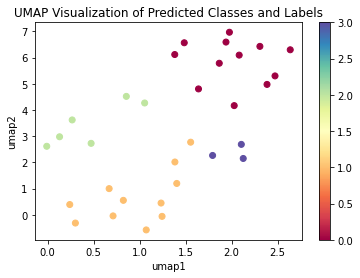

In [33]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


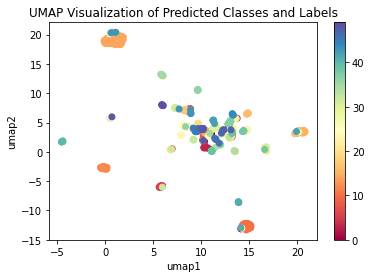

In [34]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_before=True, unsharp=True, unsharp_radius=40)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_before=True, unsharp=True, unsharp_radius=40)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


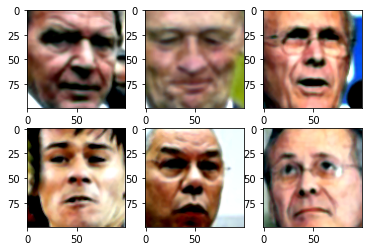

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_unsharp(radius40)_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8042 Time: 17.4465
Step: [20/53] Epoch [1/20] Loss: 3.4756 Time: 32.5280
Step: [30/53] Epoch [1/20] Loss: 5.1336 Time: 47.8839
Step: [40/53] Epoch [1/20] Loss: 6.7331 Time: 62.9964
Step: [50/53] Epoch [1/20] Loss: 8.3037 Time: 78.3345
Step: [53/53] Epoch [1/20] Loss: 8.6873 Time: 81.8930
Epoch [1/20] Loss: 8.6873 Time: 81.8932 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3888 Time: 97.0091
Step: [20/53] Epoch [2/20] Loss: 2.7436 Time: 112.3441
Step: [30/53] Epoch [2/20] Loss: 4.0736 Time: 127.4708
Step: [40/53] Epoch [2/20] Loss: 5.4870 Time: 142.5365
Step: [50/53] Epoch [2/20] Loss: 6.8407 Time: 157.8297
Step: [53/53] Epoch [2/20] Loss: 7.2102 Time: 161.3460
Epoch [2/20] Loss: 7.2102 Time: 161.3461 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2622 Time: 176.4622
Step: [20/53] Epoch [3/20] Loss: 2.5031 Time: 191.7970
Step: [30/53] Epoch [3/20] Loss: 3.7857 Time: 206.8617
Step: [40/53] Epoch [3/20] Loss: 5.0480 Time: 222.1568
Step

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_median_unsharp(radius40)_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:37<00:00,  1.45s/it]


R@1 : 86.924
R@2 : 90.411
R@4 : 92.030
R@8 : 94.147
R@16 : 96.513
R@32 : 98.132


[0.8692403486924035,
 0.9041095890410958,
 0.9202988792029888,
 0.9414694894146949,
 0.9651307596513076,
 0.9813200498132005]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


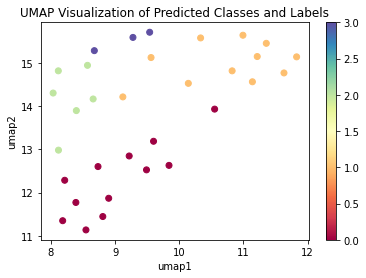

In [8]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


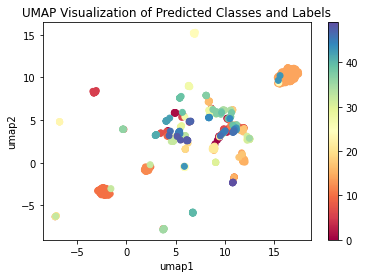

In [9]:
visualize_umap(model, test_loader, mode=2)

In [16]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_before=True, unsharp=True, unsharp_amount=.001)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_before=True, unsharp=True, unsharp_amount=.001)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

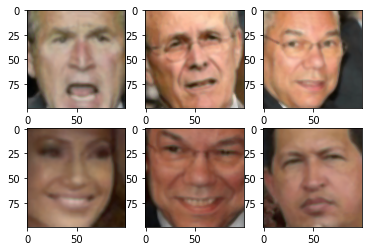

In [17]:
display_images(train_loader, h=2,w=3)

In [18]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_unsharp(amount0001)_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8657 Time: 13.9068
Step: [20/53] Epoch [1/20] Loss: 3.5902 Time: 27.6545
Step: [30/53] Epoch [1/20] Loss: 5.2559 Time: 41.3996
Step: [40/53] Epoch [1/20] Loss: 6.8740 Time: 55.3182
Step: [50/53] Epoch [1/20] Loss: 8.4582 Time: 69.0177
Step: [53/53] Epoch [1/20] Loss: 8.8575 Time: 72.2589
Epoch [1/20] Loss: 8.8575 Time: 72.2596 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4716 Time: 86.1789
Step: [20/53] Epoch [2/20] Loss: 2.8919 Time: 99.8623
Step: [30/53] Epoch [2/20] Loss: 4.3157 Time: 113.5855
Step: [40/53] Epoch [2/20] Loss: 5.7189 Time: 127.5028
Step: [50/53] Epoch [2/20] Loss: 7.1386 Time: 141.2294
Step: [53/53] Epoch [2/20] Loss: 7.5251 Time: 144.4326
Epoch [2/20] Loss: 7.5251 Time: 144.4332 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3596 Time: 158.3979
Step: [20/53] Epoch [3/20] Loss: 2.7047 Time: 172.1442
Step: [30/53] Epoch [3/20] Loss: 3.9752 Time: 185.8317
Step: [40/53] Epoch [3/20] Loss: 5.2159 Time: 199.7629
Step:

In [19]:
model = torch.load('./saved_models/resnet50_lfw50_median_unsharp(amount0001)_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [20]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 92.030
R@2 : 92.777
R@4 : 93.524
R@8 : 94.521
R@16 : 96.015
R@32 : 97.883


[0.9202988792029888,
 0.9277708592777086,
 0.9352428393524284,
 0.9452054794520548,
 0.9601494396014943,
 0.9788293897882939]

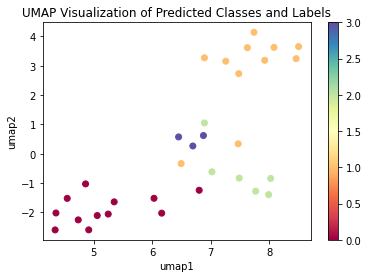

In [21]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


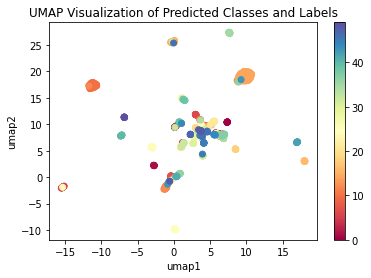

In [22]:
visualize_umap(model, test_loader, mode=2)

In [25]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True, unsharp=True, unsharp_amount=.001)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True, unsharp=True, unsharp_amount=.001)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

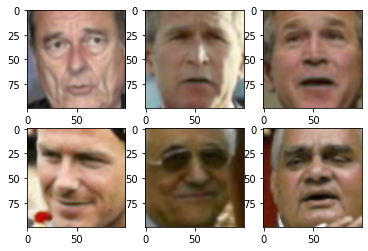

In [26]:
display_images(train_loader, h=2,w=3)

In [27]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp(amount0001)_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8606 Time: 13.7762
Step: [20/53] Epoch [1/20] Loss: 3.7024 Time: 27.7225
Step: [30/53] Epoch [1/20] Loss: 5.3730 Time: 41.5652
Step: [40/53] Epoch [1/20] Loss: 6.9439 Time: 55.5734
Step: [50/53] Epoch [1/20] Loss: 8.5529 Time: 69.3493
Step: [53/53] Epoch [1/20] Loss: 8.9628 Time: 72.5434
Epoch [1/20] Loss: 8.9628 Time: 72.5442 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4390 Time: 86.2819
Step: [20/53] Epoch [2/20] Loss: 2.8812 Time: 100.2485
Step: [30/53] Epoch [2/20] Loss: 4.2776 Time: 113.9645
Step: [40/53] Epoch [2/20] Loss: 5.7153 Time: 127.7111
Step: [50/53] Epoch [2/20] Loss: 7.1326 Time: 141.6683
Step: [53/53] Epoch [2/20] Loss: 7.5347 Time: 144.8632
Epoch [2/20] Loss: 7.5347 Time: 144.8637 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3641 Time: 158.6317
Step: [20/53] Epoch [3/20] Loss: 2.6063 Time: 172.5818
Step: [30/53] Epoch [3/20] Loss: 3.8416 Time: 186.3057
Step: [40/53] Epoch [3/20] Loss: 5.1618 Time: 200.1560
Step

In [28]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp(amount0001)_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [29]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 88.917
R@2 : 91.532
R@4 : 93.773
R@8 : 95.517
R@16 : 96.638
R@32 : 97.509


[0.8891656288916563,
 0.9153175591531756,
 0.937733499377335,
 0.9551681195516812,
 0.9663760896637609,
 0.975093399750934]

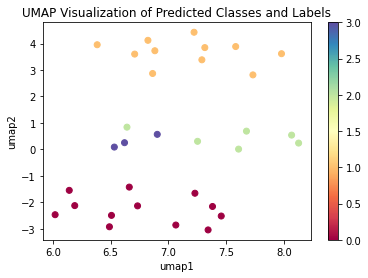

In [30]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


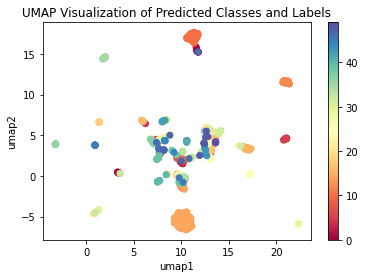

In [31]:
visualize_umap(model, test_loader, mode=2)

In [5]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, denoise_wavelet=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, denoise_wavelet=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

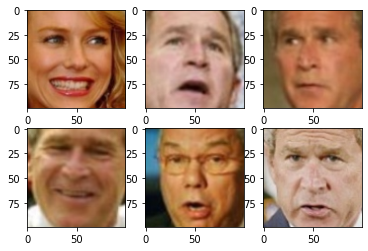

In [6]:
display_images(train_loader, h=2,w=3)

In [8]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_denoise-wavelet_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8823 Time: 13.1469
Step: [20/53] Epoch [1/20] Loss: 3.6439 Time: 23.8829
Step: [30/53] Epoch [1/20] Loss: 5.3429 Time: 34.8005
Step: [40/53] Epoch [1/20] Loss: 6.9327 Time: 45.5503
Step: [50/53] Epoch [1/20] Loss: 8.4569 Time: 56.2896
Step: [53/53] Epoch [1/20] Loss: 8.8569 Time: 58.8231
Epoch [1/20] Loss: 8.8569 Time: 58.8237 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4853 Time: 69.7436
Step: [20/53] Epoch [2/20] Loss: 2.9021 Time: 80.4733
Step: [30/53] Epoch [2/20] Loss: 4.2719 Time: 91.1718
Step: [40/53] Epoch [2/20] Loss: 5.6639 Time: 101.8868
Step: [50/53] Epoch [2/20] Loss: 7.0579 Time: 112.8571
Step: [53/53] Epoch [2/20] Loss: 7.4084 Time: 115.3933
Epoch [2/20] Loss: 7.4084 Time: 115.3936 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3388 Time: 126.0822
Step: [20/53] Epoch [3/20] Loss: 2.7240 Time: 136.7557
Step: [30/53] Epoch [3/20] Loss: 4.0066 Time: 147.6634
Step: [40/53] Epoch [3/20] Loss: 5.3307 Time: 158.4084
Step: 

In [9]:
model = torch.load('./saved_models/resnet50_lfw50_denoise-wavelet_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [10]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


R@1 : 88.169
R@2 : 90.286
R@4 : 91.781
R@8 : 93.151
R@16 : 95.517
R@32 : 97.136


[0.8816936488169365,
 0.9028642590286425,
 0.9178082191780822,
 0.9315068493150684,
 0.9551681195516812,
 0.9713574097135741]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


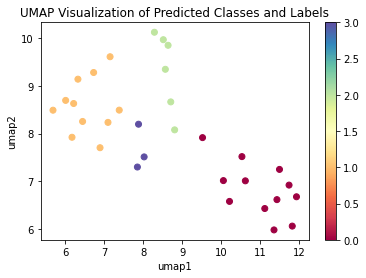

In [11]:
visualize_umap(model, test_loader)

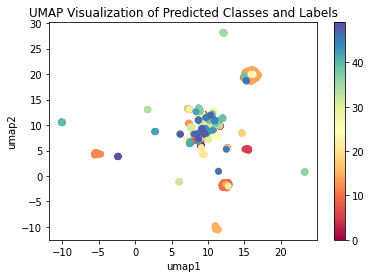

In [12]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


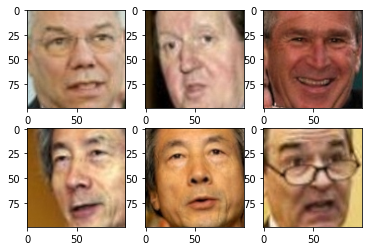

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median-unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8304 Time: 13.3361
Step: [20/53] Epoch [1/20] Loss: 3.5536 Time: 24.2918
Step: [30/53] Epoch [1/20] Loss: 5.2138 Time: 35.3800
Step: [40/53] Epoch [1/20] Loss: 6.8239 Time: 46.2666
Step: [50/53] Epoch [1/20] Loss: 8.3539 Time: 57.2013
Step: [53/53] Epoch [1/20] Loss: 8.7792 Time: 59.9440
Epoch [1/20] Loss: 8.7792 Time: 59.9442 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3962 Time: 70.8168
Step: [20/53] Epoch [2/20] Loss: 2.7872 Time: 81.6765
Step: [30/53] Epoch [2/20] Loss: 4.1555 Time: 92.5464
Step: [40/53] Epoch [2/20] Loss: 5.5541 Time: 103.6157
Step: [50/53] Epoch [2/20] Loss: 6.9229 Time: 114.5117
Step: [53/53] Epoch [2/20] Loss: 7.3117 Time: 117.0469
Epoch [2/20] Loss: 7.3117 Time: 117.0475 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2901 Time: 127.9609
Step: [20/53] Epoch [3/20] Loss: 2.5282 Time: 139.0846
Step: [30/53] Epoch [3/20] Loss: 3.6925 Time: 150.0429
Step: [40/53] Epoch [3/20] Loss: 4.9496 Time: 160.9694
Step: 

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_median-unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:27<00:00,  1.04s/it]


R@1 : 90.909
R@2 : 92.528
R@4 : 94.022
R@8 : 95.641
R@16 : 96.887
R@32 : 97.385


[0.9090909090909091,
 0.925280199252802,
 0.9402241594022416,
 0.9564134495641345,
 0.9688667496886675,
 0.9738480697384807]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


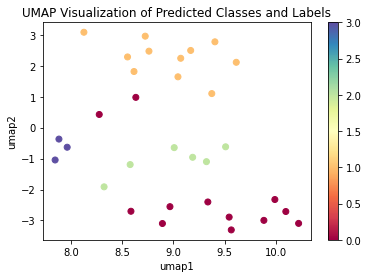

In [8]:
visualize_umap(model, test_loader)

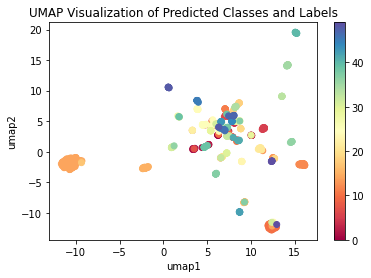

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_before=True, median_unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_before=True, median_unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


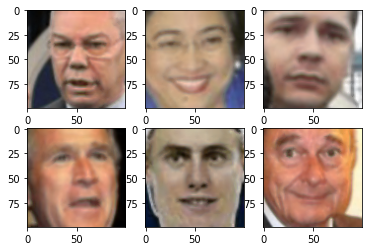

In [11]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_median-unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8866 Time: 13.9596
Step: [20/53] Epoch [1/20] Loss: 3.6231 Time: 28.0918
Step: [30/53] Epoch [1/20] Loss: 5.3093 Time: 42.1104
Step: [40/53] Epoch [1/20] Loss: 6.9119 Time: 56.2010
Step: [50/53] Epoch [1/20] Loss: 8.4611 Time: 70.1781
Step: [53/53] Epoch [1/20] Loss: 8.9101 Time: 73.4266
Epoch [1/20] Loss: 8.9101 Time: 73.4268 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4475 Time: 87.4449
Step: [20/53] Epoch [2/20] Loss: 2.8520 Time: 101.6453
Step: [30/53] Epoch [2/20] Loss: 4.2764 Time: 115.5667
Step: [40/53] Epoch [2/20] Loss: 5.6767 Time: 129.6833
Step: [50/53] Epoch [2/20] Loss: 7.1234 Time: 143.5745
Step: [53/53] Epoch [2/20] Loss: 7.4910 Time: 146.8089
Epoch [2/20] Loss: 7.4910 Time: 146.8091 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2322 Time: 160.7468
Step: [20/53] Epoch [3/20] Loss: 2.4478 Time: 174.8391
Step: [30/53] Epoch [3/20] Loss: 3.6519 Time: 188.7627
Step: [40/53] Epoch [3/20] Loss: 4.9000 Time: 202.9331
Step

In [13]:
model = torch.load('./saved_models/resnet50_lfw50_median_median-unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.32s/it]


R@1 : 89.415
R@2 : 91.656
R@4 : 92.403
R@8 : 94.022
R@16 : 96.139
R@32 : 97.509


[0.8941469489414695,
 0.9165628891656289,
 0.9240348692403487,
 0.9402241594022416,
 0.9613947696139477,
 0.975093399750934]

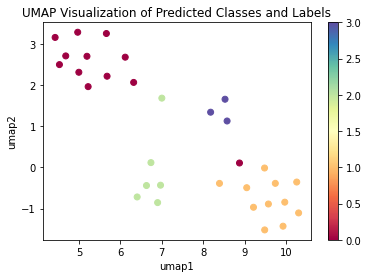

In [15]:
visualize_umap(model, test_loader)

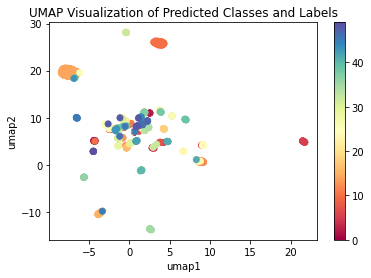

In [16]:
visualize_umap(model, test_loader, mode=2)

In [17]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_unsharp=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_unsharp=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

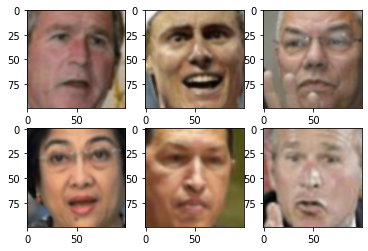

In [18]:
display_images(train_loader, h=2,w=3)

In [19]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median-unsharp_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8188 Time: 14.1948
Step: [20/53] Epoch [1/20] Loss: 3.5537 Time: 28.1813
Step: [30/53] Epoch [1/20] Loss: 5.1581 Time: 42.2613
Step: [40/53] Epoch [1/20] Loss: 6.7407 Time: 56.4732
Step: [50/53] Epoch [1/20] Loss: 8.2767 Time: 70.4555
Step: [53/53] Epoch [1/20] Loss: 8.7171 Time: 73.7193
Epoch [1/20] Loss: 8.7171 Time: 73.7197 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4019 Time: 87.7170
Step: [20/53] Epoch [2/20] Loss: 2.7442 Time: 101.9058
Step: [30/53] Epoch [2/20] Loss: 4.0804 Time: 115.8440
Step: [40/53] Epoch [2/20] Loss: 5.4377 Time: 129.9790
Step: [50/53] Epoch [2/20] Loss: 6.7532 Time: 143.9358
Step: [53/53] Epoch [2/20] Loss: 7.1420 Time: 147.1936
Epoch [2/20] Loss: 7.1420 Time: 147.1940 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3082 Time: 161.2173
Step: [20/53] Epoch [3/20] Loss: 2.6049 Time: 175.4378
Step: [30/53] Epoch [3/20] Loss: 3.9084 Time: 189.4404
Step: [40/53] Epoch [3/20] Loss: 5.1619 Time: 203.5957
Step

In [20]:
model = torch.load('./saved_models/resnet50_lfw50_median-unsharp_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [21]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.34s/it]


R@1 : 89.788
R@2 : 92.403
R@4 : 94.147
R@8 : 95.143
R@16 : 96.638
R@32 : 97.758


[0.8978829389788294,
 0.9240348692403487,
 0.9414694894146949,
 0.9514321295143213,
 0.9663760896637609,
 0.9775840597758406]

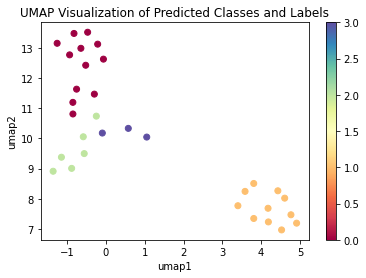

In [22]:
visualize_umap(model, test_loader)

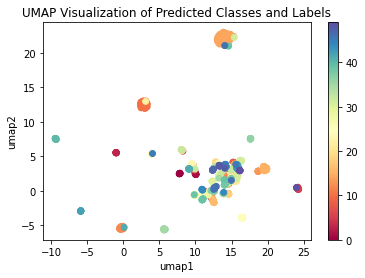

In [23]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_hsv='hsv')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_hsv='hsv')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

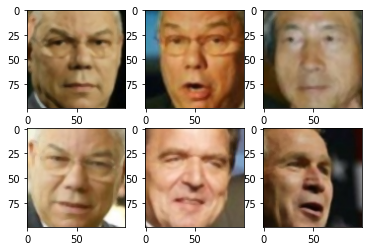

In [5]:
display_images(train_loader, h=2,w=3)

In [6]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_medianhsv_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.9044 Time: 13.8929
Step: [20/53] Epoch [1/20] Loss: 3.6089 Time: 25.1725
Step: [30/53] Epoch [1/20] Loss: 5.2445 Time: 36.6737
Step: [40/53] Epoch [1/20] Loss: 6.8589 Time: 47.9812
Step: [50/53] Epoch [1/20] Loss: 8.3884 Time: 59.3973
Step: [53/53] Epoch [1/20] Loss: 8.8200 Time: 62.0667
Epoch [1/20] Loss: 8.8200 Time: 62.0672 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4274 Time: 73.6459
Step: [20/53] Epoch [2/20] Loss: 2.8318 Time: 84.9684
Step: [30/53] Epoch [2/20] Loss: 4.1658 Time: 96.3309
Step: [40/53] Epoch [2/20] Loss: 5.4703 Time: 107.8487
Step: [50/53] Epoch [2/20] Loss: 6.8768 Time: 119.1360
Step: [53/53] Epoch [2/20] Loss: 7.2787 Time: 121.7461
Epoch [2/20] Loss: 7.2787 Time: 121.7466 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2672 Time: 133.0642
Step: [20/53] Epoch [3/20] Loss: 2.5161 Time: 144.5348
Step: [30/53] Epoch [3/20] Loss: 3.7483 Time: 155.8499
Step: [40/53] Epoch [3/20] Loss: 5.0302 Time: 167.1402
Step: 

In [7]:
model = torch.load('./saved_models/resnet50_lfw50_medianhsv_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [8]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:27<00:00,  1.08s/it]


R@1 : 89.664
R@2 : 91.532
R@4 : 93.275
R@8 : 94.894
R@16 : 96.638
R@32 : 98.132


[0.8966376089663761,
 0.9153175591531756,
 0.9327521793275217,
 0.9489414694894147,
 0.9663760896637609,
 0.9813200498132005]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


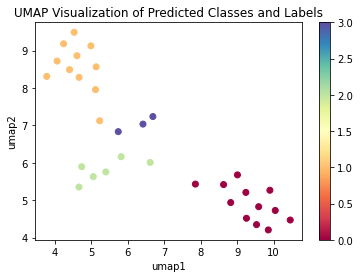

In [9]:
visualize_umap(model, test_loader)

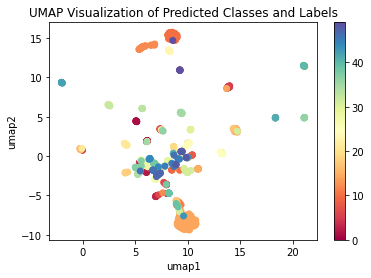

In [10]:
visualize_umap(model, test_loader, mode=2)

In [11]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_hsv='v')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_hsv='v')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

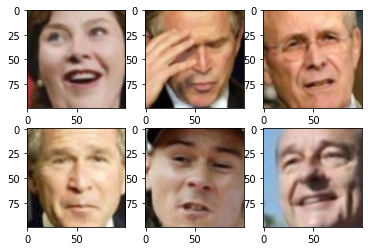

In [12]:
display_images(train_loader, h=2,w=3)

In [13]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_medianv_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8630 Time: 10.7699
Step: [20/53] Epoch [1/20] Loss: 3.6231 Time: 21.4161
Step: [30/53] Epoch [1/20] Loss: 5.3152 Time: 32.2688
Step: [40/53] Epoch [1/20] Loss: 6.9767 Time: 42.9325
Step: [50/53] Epoch [1/20] Loss: 8.5696 Time: 53.6087
Step: [53/53] Epoch [1/20] Loss: 9.0118 Time: 56.0995
Epoch [1/20] Loss: 9.0118 Time: 56.1001 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.5209 Time: 66.9526
Step: [20/53] Epoch [2/20] Loss: 3.0083 Time: 77.6085
Step: [30/53] Epoch [2/20] Loss: 4.4904 Time: 88.3053
Step: [40/53] Epoch [2/20] Loss: 5.9433 Time: 99.2161
Step: [50/53] Epoch [2/20] Loss: 7.3440 Time: 109.9105
Step: [53/53] Epoch [2/20] Loss: 7.7467 Time: 112.4071
Epoch [2/20] Loss: 7.7467 Time: 112.4074 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2914 Time: 123.0519
Step: [20/53] Epoch [3/20] Loss: 2.6243 Time: 133.8838
Step: [30/53] Epoch [3/20] Loss: 3.9809 Time: 144.5490
Step: [40/53] Epoch [3/20] Loss: 5.2892 Time: 155.2114
Step: [

In [14]:
model = torch.load('./saved_models/resnet50_lfw50_medianv_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [15]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


R@1 : 88.294
R@2 : 91.034
R@4 : 91.905
R@8 : 94.396
R@16 : 96.638
R@32 : 98.257


[0.8829389788293898,
 0.9103362391033624,
 0.9190535491905355,
 0.9439601494396015,
 0.9663760896637609,
 0.9825653798256538]

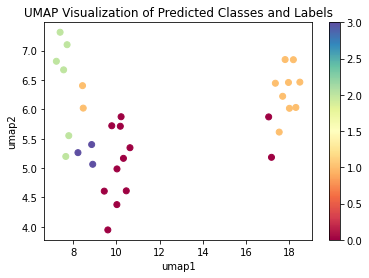

In [16]:
visualize_umap(model, test_loader)

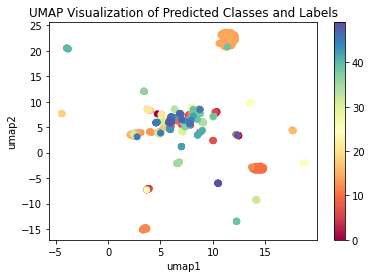

In [17]:
visualize_umap(model, test_loader, mode=2)

In [18]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_hsv='s')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_hsv='s')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

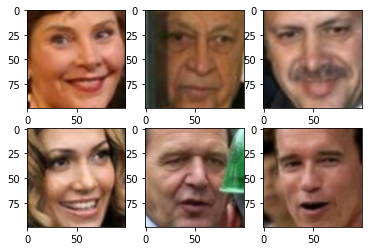

In [19]:
display_images(train_loader, h=2,w=3)

In [20]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_medians_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8744 Time: 10.6880
Step: [20/53] Epoch [1/20] Loss: 3.6427 Time: 21.5871
Step: [30/53] Epoch [1/20] Loss: 5.2898 Time: 32.2812
Step: [40/53] Epoch [1/20] Loss: 6.9094 Time: 43.0109
Step: [50/53] Epoch [1/20] Loss: 8.4682 Time: 53.7114
Step: [53/53] Epoch [1/20] Loss: 8.8864 Time: 56.2022
Epoch [1/20] Loss: 8.8864 Time: 56.2035 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4427 Time: 67.0921
Step: [20/53] Epoch [2/20] Loss: 2.8629 Time: 77.8541
Step: [30/53] Epoch [2/20] Loss: 4.2727 Time: 88.5234
Step: [40/53] Epoch [2/20] Loss: 5.7249 Time: 99.4655
Step: [50/53] Epoch [2/20] Loss: 7.1761 Time: 110.2002
Step: [53/53] Epoch [2/20] Loss: 7.6123 Time: 112.6882
Epoch [2/20] Loss: 7.6123 Time: 112.6893 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3714 Time: 123.3425
Step: [20/53] Epoch [3/20] Loss: 2.7430 Time: 134.2047
Step: [30/53] Epoch [3/20] Loss: 4.0628 Time: 144.8931
Step: [40/53] Epoch [3/20] Loss: 5.3660 Time: 155.5708
Step: [

In [21]:
model = torch.load('./saved_models/resnet50_lfw50_medians_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [22]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


R@1 : 90.037
R@2 : 92.279
R@4 : 93.524
R@8 : 94.645
R@16 : 96.389
R@32 : 97.509


[0.900373599003736,
 0.9227895392278954,
 0.9352428393524284,
 0.9464508094645081,
 0.9638854296388543,
 0.975093399750934]

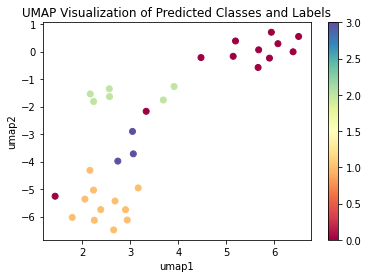

In [23]:
visualize_umap(model, test_loader)

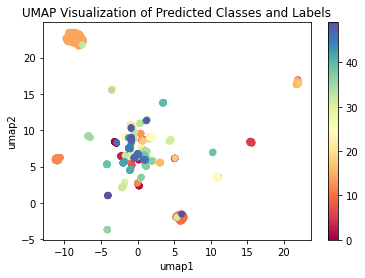

In [24]:
visualize_umap(model, test_loader, mode=2)

In [5]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_hsv='sv')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_hsv='sv')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

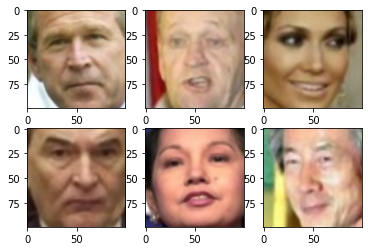

In [26]:
display_images(train_loader, h=2,w=3)

In [27]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_mediansv_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8383 Time: 10.9714
Step: [20/53] Epoch [1/20] Loss: 3.5491 Time: 21.8744
Step: [30/53] Epoch [1/20] Loss: 5.2123 Time: 33.0253
Step: [40/53] Epoch [1/20] Loss: 6.8038 Time: 43.8813
Step: [50/53] Epoch [1/20] Loss: 8.3476 Time: 54.8224
Step: [53/53] Epoch [1/20] Loss: 8.7515 Time: 57.3615
Epoch [1/20] Loss: 8.7515 Time: 57.3617 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4413 Time: 68.4973
Step: [20/53] Epoch [2/20] Loss: 2.7728 Time: 79.4059
Step: [30/53] Epoch [2/20] Loss: 4.1653 Time: 90.3664
Step: [40/53] Epoch [2/20] Loss: 5.5185 Time: 101.3678
Step: [50/53] Epoch [2/20] Loss: 6.8723 Time: 112.5008
Step: [53/53] Epoch [2/20] Loss: 7.2221 Time: 115.0497
Epoch [2/20] Loss: 7.2221 Time: 115.0501 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2314 Time: 125.9876
Step: [20/53] Epoch [3/20] Loss: 2.4133 Time: 136.9652
Step: [30/53] Epoch [3/20] Loss: 3.6896 Time: 148.0344
Step: [40/53] Epoch [3/20] Loss: 4.9110 Time: 158.9615
Step: 

In [28]:
model = torch.load('./saved_models/resnet50_lfw50_mediansv_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [29]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:27<00:00,  1.04s/it]


R@1 : 89.290
R@2 : 91.532
R@4 : 93.400
R@8 : 94.271
R@16 : 95.766
R@32 : 97.634


[0.8929016189290162,
 0.9153175591531756,
 0.933997509339975,
 0.9427148194271482,
 0.9576587795765878,
 0.9763387297633873]

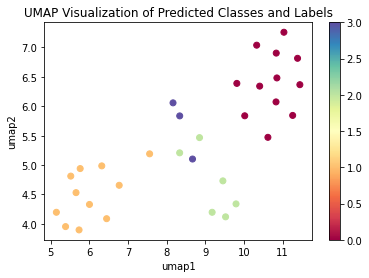

In [30]:
visualize_umap(model, test_loader)

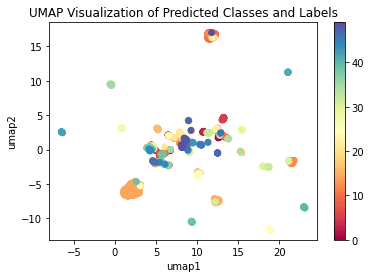

In [31]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, adjust_log=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, adjust_log=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

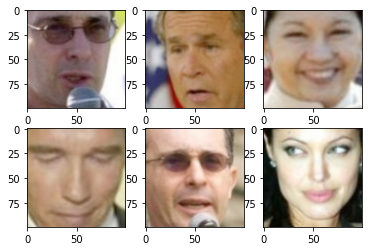

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adjust-log_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8048 Time: 12.4932
Step: [20/53] Epoch [1/20] Loss: 3.6014 Time: 22.1200
Step: [30/53] Epoch [1/20] Loss: 5.2642 Time: 32.0717
Step: [40/53] Epoch [1/20] Loss: 6.8595 Time: 41.8561
Step: [50/53] Epoch [1/20] Loss: 8.3992 Time: 51.5941
Step: [53/53] Epoch [1/20] Loss: 8.8005 Time: 53.8785
Epoch [1/20] Loss: 8.8005 Time: 53.8791 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4290 Time: 63.7341
Step: [20/53] Epoch [2/20] Loss: 2.8656 Time: 73.4509
Step: [30/53] Epoch [2/20] Loss: 4.3024 Time: 83.0584
Step: [40/53] Epoch [2/20] Loss: 5.6543 Time: 92.6970
Step: [50/53] Epoch [2/20] Loss: 7.0128 Time: 102.5016
Step: [53/53] Epoch [2/20] Loss: 7.3937 Time: 104.7394
Epoch [2/20] Loss: 7.3937 Time: 104.7401 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2860 Time: 114.3572
Step: [20/53] Epoch [3/20] Loss: 2.4863 Time: 123.9152
Step: [30/53] Epoch [3/20] Loss: 3.7551 Time: 133.5482
Step: [40/53] Epoch [3/20] Loss: 5.0042 Time: 143.3028
Step: [

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_adjust-log_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:23<00:00,  1.10it/s]


R@1 : 89.415
R@2 : 92.030
R@4 : 92.902
R@8 : 94.521
R@16 : 96.015
R@32 : 97.260


[0.8941469489414695,
 0.9202988792029888,
 0.9290161892901619,
 0.9452054794520548,
 0.9601494396014943,
 0.9726027397260274]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


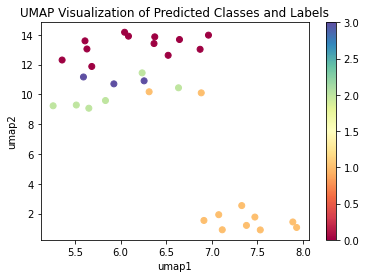

In [8]:
visualize_umap(model, test_loader)

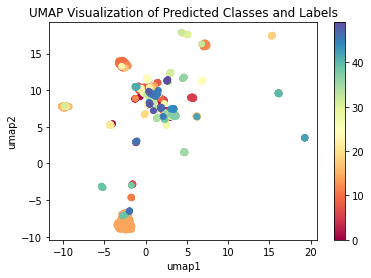

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

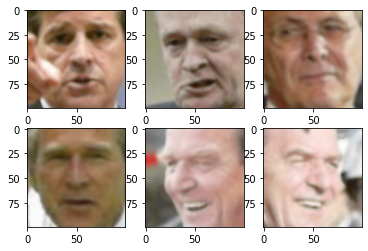

In [11]:
display_images(train_loader, h=2,w=3)

In [12]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_adjust-log_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8845 Time: 12.6153
Step: [20/53] Epoch [1/20] Loss: 3.5742 Time: 25.3880
Step: [30/53] Epoch [1/20] Loss: 5.1750 Time: 37.9903
Step: [40/53] Epoch [1/20] Loss: 6.7799 Time: 50.5447
Step: [50/53] Epoch [1/20] Loss: 8.3428 Time: 63.3469
Step: [53/53] Epoch [1/20] Loss: 8.7837 Time: 66.2753
Epoch [1/20] Loss: 8.7837 Time: 66.2757 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4318 Time: 78.8709
Step: [20/53] Epoch [2/20] Loss: 2.8071 Time: 91.3863
Step: [30/53] Epoch [2/20] Loss: 4.1574 Time: 104.1474
Step: [40/53] Epoch [2/20] Loss: 5.5052 Time: 116.6453
Step: [50/53] Epoch [2/20] Loss: 6.8859 Time: 129.3798
Step: [53/53] Epoch [2/20] Loss: 7.2555 Time: 132.3107
Epoch [2/20] Loss: 7.2555 Time: 132.3110 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2400 Time: 144.8311
Step: [20/53] Epoch [3/20] Loss: 2.4571 Time: 157.3942
Step: [30/53] Epoch [3/20] Loss: 3.6957 Time: 170.1730
Step: [40/53] Epoch [3/20] Loss: 4.9215 Time: 182.7324
Step:

In [13]:
model = torch.load('./saved_models/resnet50_lfw50_median_adjust-log_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [14]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:30<00:00,  1.19s/it]


R@1 : 90.411
R@2 : 92.279
R@4 : 93.898
R@8 : 95.019
R@16 : 97.136
R@32 : 98.257


[0.9041095890410958,
 0.9227895392278954,
 0.9389788293897883,
 0.950186799501868,
 0.9713574097135741,
 0.9825653798256538]

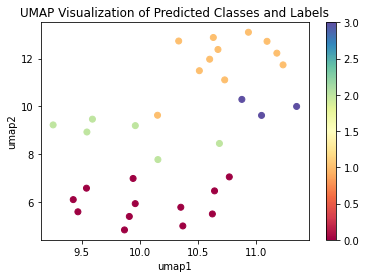

In [15]:
visualize_umap(model, test_loader)

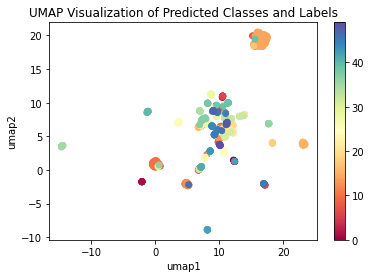

In [16]:
visualize_umap(model, test_loader, mode=2)

In [17]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

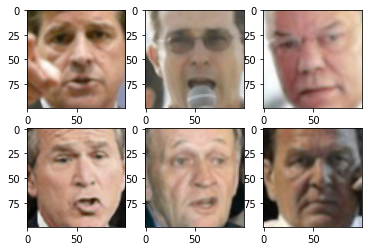

In [18]:
display_images(train_loader, h=2,w=3)

In [19]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adjust-log_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8154 Time: 12.5958
Step: [20/53] Epoch [1/20] Loss: 3.5341 Time: 25.3582
Step: [30/53] Epoch [1/20] Loss: 5.2082 Time: 37.9240
Step: [40/53] Epoch [1/20] Loss: 6.8409 Time: 50.5057
Step: [50/53] Epoch [1/20] Loss: 8.4433 Time: 63.2737
Step: [53/53] Epoch [1/20] Loss: 8.8726 Time: 66.2680
Epoch [1/20] Loss: 8.8726 Time: 66.2686 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4639 Time: 78.8843
Step: [20/53] Epoch [2/20] Loss: 2.8718 Time: 91.5777
Step: [30/53] Epoch [2/20] Loss: 4.2943 Time: 104.3961
Step: [40/53] Epoch [2/20] Loss: 5.6580 Time: 116.9710
Step: [50/53] Epoch [2/20] Loss: 7.0700 Time: 129.5329
Step: [53/53] Epoch [2/20] Loss: 7.4794 Time: 132.5036
Epoch [2/20] Loss: 7.4794 Time: 132.5041 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3252 Time: 145.3176
Step: [20/53] Epoch [3/20] Loss: 2.6178 Time: 157.8834
Step: [30/53] Epoch [3/20] Loss: 3.8807 Time: 170.6970
Step: [40/53] Epoch [3/20] Loss: 5.0853 Time: 183.3064
Step:

In [20]:
model = torch.load('./saved_models/resnet50_lfw50_adjust-log_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [21]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:30<00:00,  1.19s/it]


R@1 : 89.041
R@2 : 92.030
R@4 : 92.777
R@8 : 94.894
R@16 : 96.389
R@32 : 97.136


[0.8904109589041096,
 0.9202988792029888,
 0.9277708592777086,
 0.9489414694894147,
 0.9638854296388543,
 0.9713574097135741]

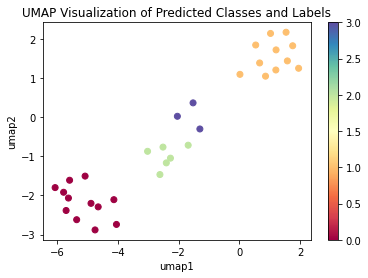

In [22]:
visualize_umap(model, test_loader)

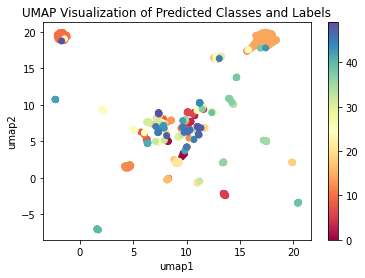

In [23]:
visualize_umap(model, test_loader, mode=2)

In [24]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log=True, unsharp_after=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log=True, unsharp_after=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


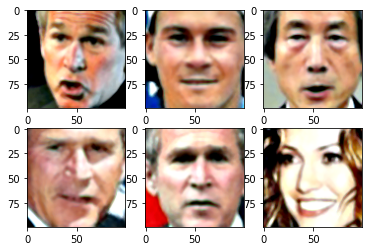

In [25]:
display_images(train_loader, h=2,w=3)

In [26]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_adjust-log_unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8390 Time: 14.1470
Step: [20/53] Epoch [1/20] Loss: 3.5313 Time: 28.2047
Step: [30/53] Epoch [1/20] Loss: 5.2152 Time: 42.2897
Step: [40/53] Epoch [1/20] Loss: 6.7762 Time: 56.1987
Step: [50/53] Epoch [1/20] Loss: 8.2950 Time: 70.3667
Step: [53/53] Epoch [1/20] Loss: 8.6994 Time: 73.6530
Epoch [1/20] Loss: 8.6994 Time: 73.6532 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4168 Time: 87.5794
Step: [20/53] Epoch [2/20] Loss: 2.8207 Time: 101.5012
Step: [30/53] Epoch [2/20] Loss: 4.1740 Time: 115.6382
Step: [40/53] Epoch [2/20] Loss: 5.5780 Time: 129.5733
Step: [50/53] Epoch [2/20] Loss: 6.9976 Time: 143.7343
Step: [53/53] Epoch [2/20] Loss: 7.3950 Time: 147.0041
Epoch [2/20] Loss: 7.3950 Time: 147.0047 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2931 Time: 160.9157
Step: [20/53] Epoch [3/20] Loss: 2.5477 Time: 174.9013
Step: [30/53] Epoch [3/20] Loss: 3.7745 Time: 189.0417
Step: [40/53] Epoch [3/20] Loss: 4.9881 Time: 202.9354
Step

In [27]:
model = torch.load('./saved_models/resnet50_lfw50_median_adjust-log_unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [28]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.32s/it]


R@1 : 89.290
R@2 : 91.781
R@4 : 93.898
R@8 : 95.641
R@16 : 97.136
R@32 : 97.758


[0.8929016189290162,
 0.9178082191780822,
 0.9389788293897883,
 0.9564134495641345,
 0.9713574097135741,
 0.9775840597758406]

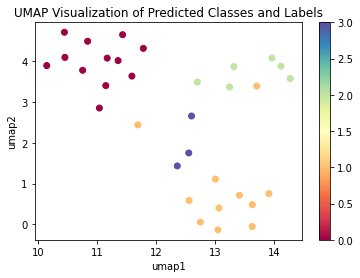

In [29]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


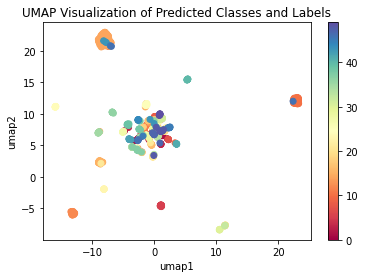

In [30]:
visualize_umap(model, test_loader, mode=2)

# Re-evaluate previous top performing

In [35]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

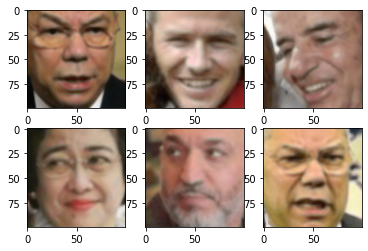

In [36]:
display_images(train_loader, h=2,w=3)

In [37]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
#                     save_path='./saved_models/resnet50_lfw50_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8734 Time: 12.6189
Step: [20/53] Epoch [1/20] Loss: 3.6536 Time: 25.0444
Step: [30/53] Epoch [1/20] Loss: 5.2570 Time: 37.4530
Step: [40/53] Epoch [1/20] Loss: 6.8734 Time: 50.1177
Step: [50/53] Epoch [1/20] Loss: 8.4933 Time: 62.5185
Step: [53/53] Epoch [1/20] Loss: 8.8732 Time: 65.4244
Epoch [1/20] Loss: 8.8732 Time: 65.4252 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4653 Time: 77.9485
Step: [20/53] Epoch [2/20] Loss: 2.9262 Time: 90.6233
Step: [30/53] Epoch [2/20] Loss: 4.3765 Time: 103.0509
Step: [40/53] Epoch [2/20] Loss: 5.7968 Time: 115.7029
Step: [50/53] Epoch [2/20] Loss: 7.1604 Time: 128.1526
Step: [53/53] Epoch [2/20] Loss: 7.5763 Time: 131.0607
Epoch [2/20] Loss: 7.5763 Time: 131.0609 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3598 Time: 143.6244
Step: [20/53] Epoch [3/20] Loss: 2.7036 Time: 156.2601
Step: [30/53] Epoch [3/20] Loss: 3.9735 Time: 168.6638
Step: [40/53] Epoch [3/20] Loss: 5.2811 Time: 181.1487
Step:

In [38]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:30<00:00,  1.18s/it]


R@1 : 88.917
R@2 : 90.785
R@4 : 91.781
R@8 : 93.026
R@16 : 95.019
R@32 : 97.136


[0.8891656288916563,
 0.9078455790784558,
 0.9178082191780822,
 0.9302615193026152,
 0.950186799501868,
 0.9713574097135741]

In [39]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


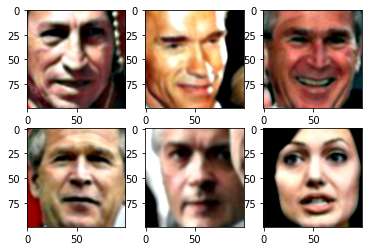

In [40]:
display_images(train_loader, h=2,w=3)

In [41]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
#                     save_path='./saved_models/resnet50_lfw50_unsharp-after_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8517 Time: 13.8338
Step: [20/53] Epoch [1/20] Loss: 3.5720 Time: 27.8739
Step: [30/53] Epoch [1/20] Loss: 5.2598 Time: 41.7182
Step: [40/53] Epoch [1/20] Loss: 6.8472 Time: 55.5223
Step: [50/53] Epoch [1/20] Loss: 8.4163 Time: 69.5439
Step: [53/53] Epoch [1/20] Loss: 8.8090 Time: 72.7454
Epoch [1/20] Loss: 8.8090 Time: 72.7458 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4084 Time: 86.5107
Step: [20/53] Epoch [2/20] Loss: 2.7737 Time: 100.5129
Step: [30/53] Epoch [2/20] Loss: 4.1521 Time: 114.3101
Step: [40/53] Epoch [2/20] Loss: 5.4884 Time: 128.0438
Step: [50/53] Epoch [2/20] Loss: 6.8873 Time: 142.1460
Step: [53/53] Epoch [2/20] Loss: 7.2785 Time: 145.3844
Epoch [2/20] Loss: 7.2785 Time: 145.3853 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2302 Time: 159.1515
Step: [20/53] Epoch [3/20] Loss: 2.4723 Time: 173.0889
Step: [30/53] Epoch [3/20] Loss: 3.7055 Time: 186.9202
Step: [40/53] Epoch [3/20] Loss: 4.9205 Time: 200.7894
Step

In [42]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 87.173
R@2 : 89.539
R@4 : 90.411
R@8 : 92.154
R@16 : 95.143
R@32 : 96.762


[0.8717310087173101,
 0.8953922789539228,
 0.9041095890410958,
 0.9215442092154421,
 0.9514321295143213,
 0.9676214196762142]